# Dataset 2


## Etapa 1

Começou-se por carregar os dados e metadados. De seguida analisaram-se as suas dimensões (20531 genes para 517 amostras de 515 
pacientes, onde dois apresentam duas amostras), e identificaram-se os tipos de atributos em cada um e fez-se um pequena analise estatística para uma melhor perceção inicial dos datasets.

Nos dados de expressão genética verificou-se a existência de 2 valores nulos na primeira coluna (_HUGO Symbol- Human Genome Organization_ ) seguindo-se a sua remoção, passando para uma dimensão de 20529 genes. Relativamente aos metadados, removeu-se uma coluna por redundância e selecionaram-se as colunas mais relevantes para utilizar na análise, segundo o valor dado às mesmas no artigo e evitando colunas com um elevado número de valores nulos (NaN), destas os valores em falta foram substituídos pela média ou moda dos atributos. Foram selecionados _Diagnosis Age (float), Fraction Genome Altered (float), Sex (object), Patient's Vital Status (object)_ e _American Joint Committee on Cancer Tumor Stage Code (object)_ com estágios T1 a T4, onde T1 é uma lesão confinada ao órgão de origem e T4 uma lesão massiva ou que invade diretamente outro órgão ou víscera, nervos, artérias ou osso. Também se selecionou _Patient Smoking History Category (float)_ , com valores de 1 a 5, cujo o primeiro, por exemplo, corresponde a uma pessoa que na altura da entrevista não fumava e fumou menos de 100 cigarros na sua vida. O atributo _Person Neoplasm Status (object)_, também selecionado, identifica se o paciente tem ou não tumor e o _Prior Cancer Diagnosis Occurence (object)_ . Estas variáveis foram melhor exploradas, com diferentes representações gráficas.


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Dados RNAseq

In [112]:
# Carregar o dataset, colocou-se o Entrez_Gene_Id como coluna índice
data_luad = pd.read_csv("data_RNA_Seq_v2_expression_median.txt",sep="\t",index_col=1)

In [113]:
# Verificar a dimensão do dataset
data_luad.shape

(20531, 518)

In [114]:
# Verificar o tipo de atributos nos dados
print("Tipos de atributos (dados):")
print(data_luad.dtypes)

Tipos de atributos (dados):
Hugo_Symbol         object
TCGA-05-4244-01    float64
TCGA-05-4249-01    float64
TCGA-05-4250-01    float64
TCGA-05-4382-01    float64
                    ...   
TCGA-NJ-A55O-01    float64
TCGA-NJ-A55R-01    float64
TCGA-NJ-A7XG-01    float64
TCGA-O1-A52J-01    float64
TCGA-S2-AA1A-01    float64
Length: 518, dtype: object


In [115]:
#retornar por padrão as primeiras 5 linhas do dataset
data_luad.head()

,Hugo_Symbol,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
100130426,LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
100133144,UBE2Q2P3,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
100134869,UBE2Q2P3,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
10357,LOC149767,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265
10431,TIMM23,848.9397,924.0158,1140.6781,807.1729,562.0037,1342.6174,1148.3315,955.9141,844.5792,...,919.1686,403.4911,918.9533,995.6058,536.7602,873.9790,766.7448,677.7333,1137.3206,565.4335


In [116]:
#Selecionar a coluna HUGO_Symbol (coluna 0) (Human Genome Organization) e quantificar valores nulos
data_luad.iloc[:,0].isnull().sum() # HUGO - valores nulos

2

In [117]:
#Tratamento de valores nulos

#Remover linhas com Hugo Symbol como NaN (not a number)
data_hugo_luad = data_luad[data_luad.notna()['Hugo_Symbol']] 

#Definir o Hugo_symbol como id do gene, sendo removida a coluna anterior (Entrez_Gene_Id), visto que era informação repetida. 
data_hugo_luad = data_hugo_luad.set_index("Hugo_Symbol", drop=True) #drop=true significa que a coluna Hugo_symbol é um índice não considerado uma coluna

In [118]:
#Verificar a dimensão do dataset sem valores nulos
data_hugo_luad.shape  # 20529 genes e 517 amostras (cada coluna é uma amostra) a coluna index não é contabilizada

(20529, 517)

In [119]:
#Retornar as primeiras 5 linhas do dataset sem valores nulos e com Hugo_symbol como chave
data_hugo_luad.head()

,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,TCGA-05-4396-01,TCGA-05-4397-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
UBE2Q2P3,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,13.5406,9.4467,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
UBE2Q2P3,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,16.0273,10.4318,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
LOC149767,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1809,57.0596,108.4155,84.2496,...,163.5739,130.7486,101.7403,82.4231,100.4196,100.1867,74.7210,85.3715,61.1388,76.9265
TIMM23,848.9397,924.0158,1140.6781,807.1729,562.0037,1342.6174,1148.3315,955.9141,844.5792,1397.9017,...,919.1686,403.4911,918.9533,995.6058,536.7602,873.9790,766.7448,677.7333,1137.3206,565.4335


In [120]:
# Transposta para colocar 1 gene em cada coluna
data_transposta = data_hugo_luad.transpose()

# Converte o índice atual numa coluna comum no DataFrame
data_transposta = data_transposta.reset_index()

# Nomear essa coluna Sample ID para posterior merge 
data_transposta.rename(columns={'index': 'Sample ID'}, inplace=True)

# Retirar o nome da coluna índice (Hugo_Symbol)
data_transposta = data_transposta.rename_axis(None, axis=1)

#Verificar
data_transposta.head()

,Sample ID,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,...,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
0,TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.9397,0.0,345.2308,1.0472,0.0000,...,39.7940,292.5212,959.2460,0.6981,1088.0531,2837.9440,871.2802,575.2683,6.6323,0.0
1,TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.0158,0.0,145.2025,1.6098,0.0000,...,62.1376,493.5597,1179.3275,20.2833,787.5061,2351.2500,1138.1170,690.2752,179.9738,0.0
2,TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.6781,0.0,51.7284,0.0000,0.0000,...,60.0182,365.4149,843.9028,26.5274,475.1720,5437.4534,1170.5214,532.8691,6.3003,0.0
3,TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.1729,0.0,240.0221,0.4786,0.2393,...,40.4424,346.7517,946.6872,64.8514,908.1593,6770.1537,1169.2401,663.8297,35.1777,0.0
4,TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.0037,0.0,274.2822,0.6109,0.0000,...,80.0244,563.2254,1320.7086,7.9414,778.8638,3341.4783,1737.3244,723.2743,378.1307,0.0


In [121]:
#verificar pelas colunas
data_transposta.columns

Index(['Sample ID', 'LOC100130426', 'UBE2Q2P3', 'UBE2Q2P3', 'LOC149767',
       'TIMM23', 'MOXD2', 'LOC155060', 'RNU12-2P', 'SSX9',
       ...
       'ZXDA', 'ZXDB', 'LOC100130182', 'ZYG11A', 'ZYG11B', 'ZYX', 'FLJ10821',
       'ZZZ3', 'HUMRTVLH3', 'AKR1C6P'],
      dtype='object', length=20530)

In [122]:
# Breve analise estatistica
data_transposta.describe(include = "all")

,Sample ID,LOC100130426,UBE2Q2P3,UBE2Q2P3,LOC149767,TIMM23,MOXD2,LOC155060,RNU12-2P,SSX9,...,ZXDA,ZXDB,LOC100130182,ZYG11A,ZYG11B,ZYX,FLJ10821,ZZZ3,HUMRTVLH3,AKR1C6P
count,517,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
unique,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TCGA-05-4244-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.019793,12.563599,13.772414,109.191745,921.412556,0.000518,200.965270,0.456712,0.144994,...,48.018296,383.145637,1082.626088,61.012445,849.987180,4049.562512,1080.205735,710.462033,127.999331,0.176634
std,NaN,0.110964,10.824164,11.507095,54.083375,362.542965,0.011769,156.827547,0.605640,1.625181,...,21.424549,169.977557,339.329517,74.516301,259.159593,1869.604727,440.005370,319.317913,251.016470,0.896453
min,NaN,0.000000,0.000000,0.000000,36.357000,270.115400,0.000000,11.022000,0.000000,0.000000,...,8.879000,34.099400,311.314600,0.000000,264.413200,446.043200,183.841200,219.603600,0.685400,0.000000
25%,NaN,0.000000,5.357900,5.888000,78.785300,671.334600,0.000000,89.459200,0.000000,0.000000,...,34.482800,276.152700,851.610700,5.879200,675.758400,2650.125500,776.395500,548.513500,10.759700,0.000000
50%,NaN,0.000000,10.456700,11.282000,97.173100,848.939700,0.000000,160.488400,0.305600,0.000000,...,44.308600,346.751700,1040.429600,37.424400,815.834800,3811.870500,1033.582100,663.253200,25.665900,0.000000
75%,NaN,0.000000,16.079700,17.981600,122.073800,1072.048400,0.000000,269.594000,0.746300,0.000000,...,58.514100,463.612700,1257.618600,86.475300,978.162000,5176.296700,1339.449500,807.746300,128.659200,0.000000


__Describe: Análise estatística__
* Contagem (count): Número de observações não nulas.
* Média (mean): Média aritmética dos valores.
* Desvio padrão (std): Medida de dispersão dos valores em relação à média.
* Valor mínimo (min): Menor valor na coluna.
* Quartil inferior (25%): Valor abaixo do qual 25% dos dados se encontram.
* Mediana (50%): Valor abaixo do qual 50% dos dados se encontram (também conhecido como segundo quartil).
* Quartil superior (75%): Valor abaixo do qual 75% dos dados se encontram.
* Valor máximo (max): Maior valor na coluna.

### Metadados

In [123]:
# Carregar metadados
# Selecionou-se a coluna Sample ID como índice porque é a coluna que ambos os datasets têm em comum
meta_luad = pd.read_csv("luad_tcga_clinical_data.tsv",sep="\t",header=0,index_col=2)

#Eliminar coluna Study ID por identificar o estudo, que é igual em todas as amostras, sendo por isso irrelevante
del meta_luad["Study ID"]

In [124]:
#Verificar a dimensão dos metadados
meta_luad.shape  ## 517 amostras x 106 variaveis

(517, 106)

In [125]:
#Retornar as primeiras 5 linhas dos metadados
meta_luad.head()

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
Sample ID,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01,TCGA-05-4244,70.0,NaN,NaN,M1,NaN,NaN,N2,Stage IV,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4249-01,TCGA-05-4249,67.0,NaN,NaN,M0,NaN,NaN,N0,Stage IB,6th,...,NaN,NaN,NaN,5,3.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4250-01,TCGA-05-4250,79.0,NaN,NaN,M0,NaN,NaN,N1,Stage IIIA,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,NaN,A,Dead
TCGA-05-4382-01,TCGA-05-4382,68.0,NaN,NaN,M0,NaN,NaN,N0,Stage IB,6th,...,NaN,NaN,NaN,5,4.0,NaN,Lung,TUMOR FREE,A,Alive
TCGA-05-4384-01,TCGA-05-4384,66.0,NaN,NaN,M0,NaN,NaN,N2,Stage IIIA,6th,...,NaN,NaN,NaN,5,3.0,NaN,Lung,NaN,A,Alive


In [126]:
#Análise estatística dos metadados
meta_luad.describe(include = "all")

,Patient ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Metastasis Stage Code,American Joint Committee on Cancer Lymph Node Stage Code,American Joint Committee on Cancer Lymph Node Stage Code.1,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,American Joint Committee on Cancer Publication Version Type,...,Adjuvant Postoperative Targeted Therapy Administered Indicator,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Patient Smoking History Category,Primary Therapy Outcome Success Type,Tumor Site,Person Neoplasm Status,Vial number,Patient's Vital Status
count,517,498.000000,0.0,0.0,513,0.0,0.0,516,509,494,...,154,0.0,0.0,517,503.000000,149,517,419,515,517
unique,515,NaN,NaN,NaN,5,NaN,NaN,5,9,5,...,2,NaN,NaN,33,NaN,4,1,2,2,2
top,TCGA-50-5066,NaN,NaN,NaN,M0,NaN,NaN,N0,Stage IB,7th,...,NO,NaN,NaN,55,NaN,Complete Remission/Response,Lung,TUMOR FREE,A,Alive
freq,2,NaN,NaN,NaN,347,NaN,NaN,333,140,268,...,117,NaN,NaN,91,NaN,128,517,308,512,330
mean,NaN,65.373494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.813121,NaN,NaN,NaN,NaN,NaN
std,NaN,9.921273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.084510,NaN,NaN,NaN,NaN,NaN
min,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,59.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,72.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN


Verificou-se a existência de 515 ID paciente únicos, ou seja, há 2 pacientes que têm 2 amostras.

#### Verificação de correspondência
Verificar se os valores ordenados das linhas (índices = id das amostras) de "meta_luad" são iguais aos valores ordenados das colunas de "data_hugo_luad" .

In [127]:
(meta_luad.index.sort_values() == data_hugo_luad.columns.sort_values()).sum()

517

Isto permitiu concluir que as duas tabelas são relacionadas pelo Sample ID.

#### Seleção dos meta-dados mais relevantes

Selecionaram-se os meta-dados:

_Age diagnosis, Sex, Patient's Vital Status, American Joint Committee on Cancer Tumor Stage Code, Fraction Genome Altered, Patient Smoking History Category, Person Neoplasm Status_, _Prior Cancer Diagnosis Occurence_

No geral, a seleção dos meta-dados baseou-se na relevância dada pelo artigo a cada parâmetro, evitando colunas com um elevado número de valores nulos (NaN).

In [128]:
new_meta = meta_luad[['Diagnosis Age','Fraction Genome Altered','Sex',"Patient's Vital Status",'American Joint Committee on Cancer Tumor Stage Code','Patient Smoking History Category', 'Person Neoplasm Status', 'Prior Cancer Diagnosis Occurence']]
print(new_meta.head) 

<bound method NDFrame.head of                  Diagnosis Age  Fraction Genome Altered     Sex  \
Sample ID                                                         
TCGA-05-4244-01           70.0                   0.4565    MALE   
TCGA-05-4249-01           67.0                   0.2221    Male   
TCGA-05-4250-01           79.0                   0.2362  Female   
TCGA-05-4382-01           68.0                   0.0854    Male   
TCGA-05-4384-01           66.0                   0.0661    Male   
...                        ...                      ...     ...   
TCGA-NJ-A55O-01           56.0                   0.0194  Female   
TCGA-NJ-A55R-01           67.0                   0.0760    Male   
TCGA-NJ-A7XG-01           49.0                   0.4205    Male   
TCGA-O1-A52J-01           74.0                   0.5443  Female   
TCGA-S2-AA1A-01           68.0                   0.0598  Female   

                Patient's Vital Status  \
Sample ID                                
TCGA-05-4244-0

In [129]:
#colocar Sample ID como coluna comum
new_meta = new_meta.reset_index()

In [130]:
#Verificar atributos dos novos meta-dados
new_meta.dtypes

Sample ID                                               object
Diagnosis Age                                          float64
Fraction Genome Altered                                float64
Sex                                                     object
Patient's Vital Status                                  object
American Joint Committee on Cancer Tumor Stage Code     object
Patient Smoking History Category                       float64
Person Neoplasm Status                                  object
Prior Cancer Diagnosis Occurence                        object
dtype: object

In [131]:
#Conversão dos dados de Patient Smoking History Category de float para categórico
new_meta['Patient Smoking History Category'] = new_meta['Patient Smoking History Category'].astype('category') 

#Conversão dos dados de Patient's Vital Status para inteiro
new_meta["Person Neoplasm Status"] = new_meta["Person Neoplasm Status"].replace(["WITH TUMOR"],1)
new_meta["Person Neoplasm Status"] = new_meta["Person Neoplasm Status"].replace(["TUMOR FREE"],0)

# Substituição para ficar em concordância com os restantes sex
new_meta['Sex'] = new_meta['Sex'].replace(['MALE'],'Male')

#### Tratamento dos valores nulos nos atributos numéricos
Verificar quais as colunas que possuem valores nulos.

In [132]:
print(new_meta['Diagnosis Age'].isnull().sum())
print(new_meta['Fraction Genome Altered'].isnull().sum())
print(new_meta['Patient Smoking History Category'].isnull().sum())
print(new_meta['Person Neoplasm Status'].isnull().sum())
print(new_meta['Sex'].isnull().sum())
print(new_meta["Prior Cancer Diagnosis Occurence"].isnull().sum())
print(new_meta['American Joint Committee on Cancer Tumor Stage Code'].isnull().sum())
print(new_meta["Patient's Vital Status"].isnull().sum())

19
3
14
98
0
0
0
0


Nos atributos numéricos substituiram-se os valores nulos pela média e confirmou-se a sua substituição.

In [133]:
# Diagnosis Age
new_meta['Diagnosis Age'].fillna(new_meta['Diagnosis Age'].mean(),inplace=True)
print(new_meta['Diagnosis Age'].isnull().sum())

# Fraction Genome Altered
new_meta['Fraction Genome Altered'].fillna(new_meta['Fraction Genome Altered'].mean(),inplace=True)
print(new_meta['Fraction Genome Altered'].isnull().sum())

0
0


Substituiram-se os valores nulos pela moda, por se tratarem de atributos categóricos e confirmou-se a sua substituição.

In [134]:
#Patient Smoking History Category 
new_meta['Patient Smoking History Category'].fillna(new_meta['Patient Smoking History Category'].mode()[0], inplace=True)
print(new_meta['Patient Smoking History Category'].isnull().sum())
new_meta['Patient Smoking History Category'] = new_meta['Patient Smoking History Category'].astype('int') #estetico
new_meta['Patient Smoking History Category'] = new_meta['Patient Smoking History Category'].astype('category') 

#Person Neoplasm Status (apesar de se ter passado o tipo de dados para inteiros, pretende-se que os valores sejam apenas 0 ou 1)
new_meta['Person Neoplasm Status'].fillna(new_meta['Person Neoplasm Status'].mode()[0], inplace=True)
print(new_meta['Person Neoplasm Status'].isnull().sum())
new_meta['Person Neoplasm Status'] = new_meta['Person Neoplasm Status'].astype('int') #estetico

0
0


In [135]:
# Analisar os novos metadados
new_meta.describe(include = "all")

,Sample ID,Diagnosis Age,Fraction Genome Altered,Sex,Patient's Vital Status,American Joint Committee on Cancer Tumor Stage Code,Patient Smoking History Category,Person Neoplasm Status,Prior Cancer Diagnosis Occurence
count,517,517.000000,517.000000,517,517,517,517.0,517.000000,517
unique,517,NaN,NaN,2,2,9,5.0,NaN,4
top,TCGA-05-4244-01,NaN,NaN,Female,Alive,T2,4.0,NaN,No
freq,1,NaN,NaN,277,330,169,183.0,NaN,426
mean,NaN,65.373494,0.264993,NaN,NaN,NaN,NaN,0.214700,NaN
std,NaN,9.736900,0.189946,NaN,NaN,NaN,NaN,0.411012,NaN
min,NaN,38.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,59.000000,0.104600,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,66.000000,0.237000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,72.000000,0.399200,NaN,NaN,NaN,NaN,0.000000,NaN


#### Gráficos exploratórios

Os gráficos elaborados permitem a visualização da distribuição dos meta-dados.

Text(0.5, 1.0, 'Percentagem sobre o estado vital')

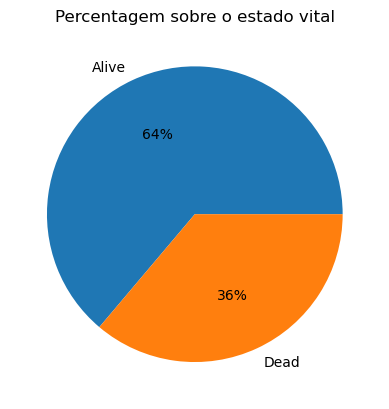

In [136]:
#Percentagem de Alive e Dead
new_meta.groupby("Patient's Vital Status").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem sobre o estado vital')

Do gráfico acima, retira-se que mais de metade dos indivíduos está vivo.

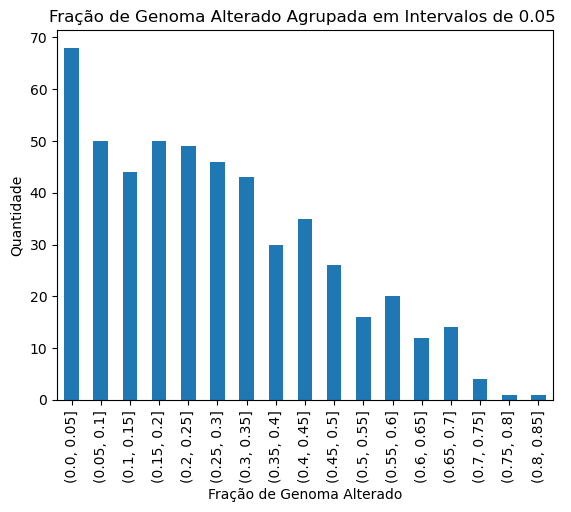

In [137]:
#Fraction Genome Altered
# Criar bins de 0.05
bins = np.arange(0, new_meta['Fraction Genome Altered'].max() + 0.05, 0.05)

# Agrupar os dados em bins e contar o tamanho de cada grupo
fga_groups = pd.cut(new_meta['Fraction Genome Altered'], bins=bins)
grouped_data = new_meta.groupby(fga_groups).size()

# Criar o gráfico de barras
grouped_data.plot.bar()
plt.title('Fração de Genoma Alterado Agrupada em Intervalos de 0.05 ')
plt.xlabel('Fração de Genoma Alterado')
plt.ylabel('Quantidade')
plt.show()

Quanto menor a fração de genoma alterado, maior a quantidade de indivíduos.

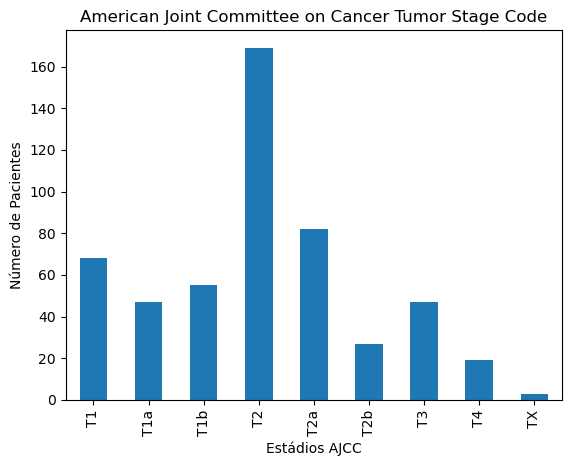

In [138]:
# American Joint Committee on Cancer Tumor Stage Code
new_meta.groupby('American Joint Committee on Cancer Tumor Stage Code').size().plot.bar()
plt.title('American Joint Committee on Cancer Tumor Stage Code')
plt.xlabel('Estádios AJCC')
plt.ylabel('Número de Pacientes')
plt.show()

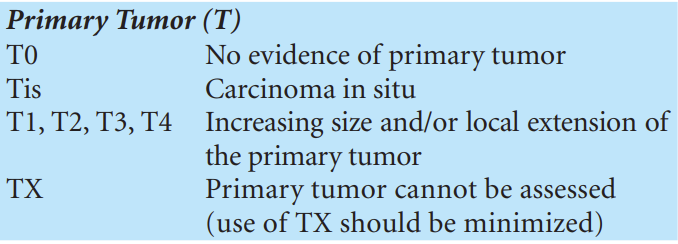

Verifica-se que o estadio AJCC mais comum é o T2.

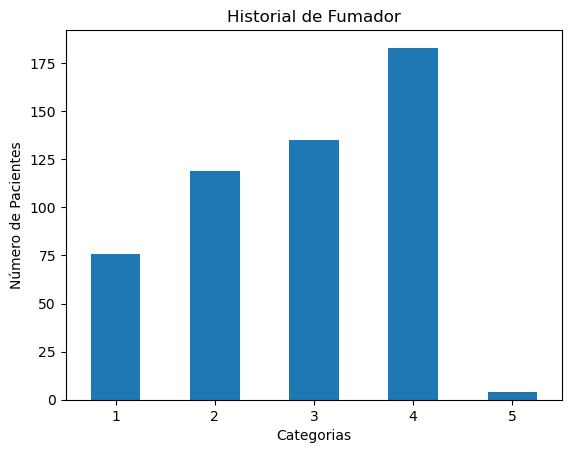

In [139]:
# Patient Smoking History Category
new_meta.groupby('Patient Smoking History Category').size().plot.bar()
plt.title('Historial de Fumador')
plt.xlabel('Categorias')
plt.ylabel('Número de Pacientes')

plt.xticks(rotation=0)  # Gira os rótulos para ficarem na horizontal
plt.xticks(range(len(new_meta['Patient Smoking History Category'].cat.categories)),
           new_meta['Patient Smoking History Category'].cat.categories)

plt.show()


Neste gráfico, as categorias têm os respetivos significados:
* 1- o paciente fumou menos de 100 cigarros ao longo da vida
* 2- o paciente é atualmente fumador, incluindo diariamente e ocasionalmente
* 3- o paciente é um ex fumador, tendo deixado há mais de 15 anos
* 4- o paciente é um ex fumador, tendo deixado há menos de 15 anos
* 5- o paciente é um ex fumador, não se sabendo quando deixou de fumar

Desta forma, é possível afirmar que a categoria 4 é a que possui um maior registo de pessoas.

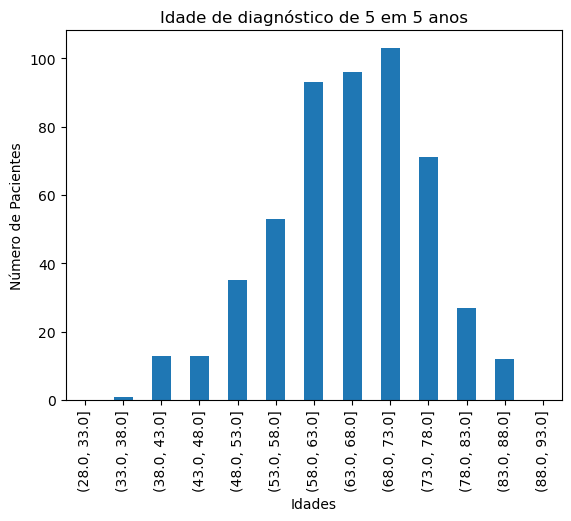

In [140]:
# Diagnosis Age
# Criar bins de 5 em 5 anos
bins = np.arange(new_meta['Diagnosis Age'].min() - 10, new_meta['Diagnosis Age'].max() + 10, 5)

# Agrupar as idades nos bins e contar o tamanho de cada grupo
age_groups = pd.cut(new_meta['Diagnosis Age'], bins=bins)
grouped_data = new_meta.groupby(age_groups).size()

# Criar o gráfico de barras
grouped_data.plot.bar()
plt.title('Idade de diagnóstico de 5 em 5 anos')
plt.xlabel('Idades')
plt.ylabel('Número de Pacientes')

plt.show()


Da análise da distribuição da faixa etária retirou-se que existe um grande número de sujeitos entre os 58 e 73 anos.

Text(0.5, 1.0, 'Percentagem dos géneros')

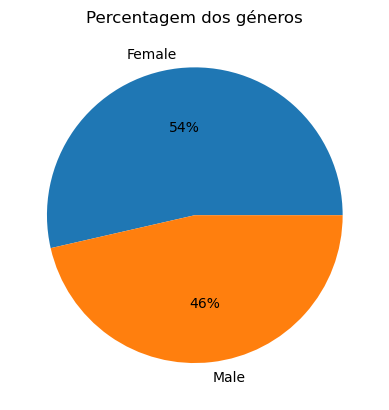

In [141]:
# Percentagens de homens e mulheres presentes no estudo
new_meta.groupby("Sex").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem dos géneros')

O número de mulheres presentes no estudo é superior ao de homens.

Text(0.5, 1.0, 'Percentagem da ocorrência prévia de cancro')

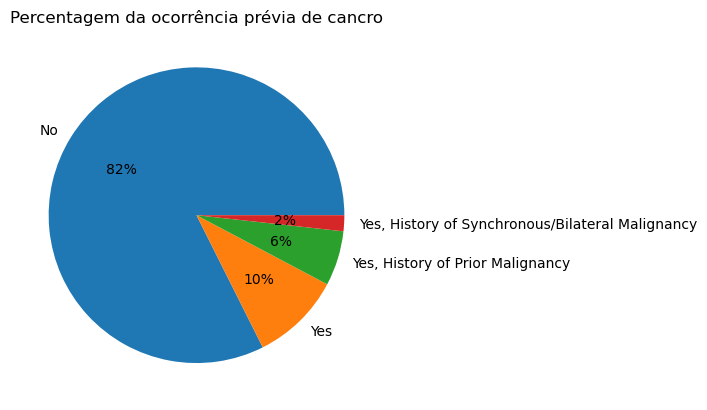

In [142]:
# Prior Cancer Diagnosis Occurence
new_meta.groupby("Prior Cancer Diagnosis Occurence").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem da ocorrência prévia de cancro')

A maioria dos participantes não apresenta historial de ocorrência de tumor.

Text(0.5, 1.0, 'Percentagem da ocorrência de cancro')

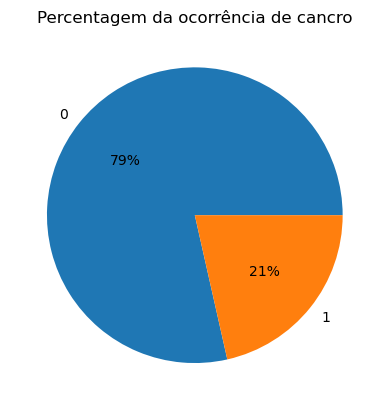

In [143]:
#Person Neoplasm Status
new_meta.groupby("Person Neoplasm Status").size().plot.pie(autopct='%.0f%%')
plt.title('Percentagem da ocorrência de cancro')
#0 significa não ter cancro
#1 significa ter cancro

Dos participantes no estudo, apenas 21% tem tumor. Este desiquilíbrio de classes vai influenciar as previsões da etapa 3.

__Os gráficos seguintes permitem analisar a correlação entre atributos.__

<Axes: title={'center': 'Percentagem dos géneros com tumor'}>

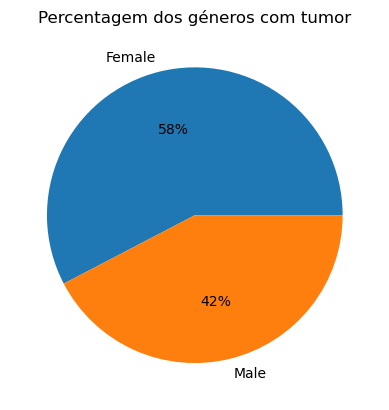

In [144]:
# Percentagens dos géneros com tumor
tumor = new_meta[new_meta["Person Neoplasm Status"] == 1]
result = tumor.groupby('Sex').size()
grafico = result.plot.pie(autopct='%.0f%%')
plt.title('Percentagem dos géneros com tumor')

grafico

A incidência de tumor é mais prevalente nas mulheres.

<Axes: title={'center': 'Percentagem do historial de fumador com tumor'}>

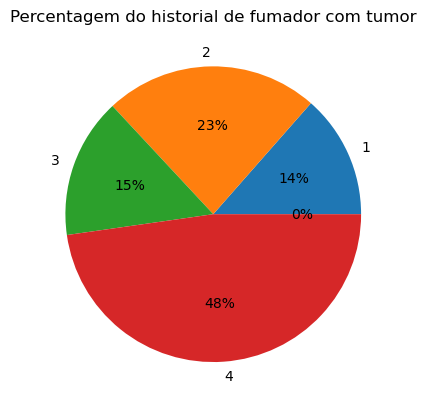

In [145]:
# Percentagens do historial de fumador com cancro
tumor = new_meta[new_meta["Person Neoplasm Status"] == 1]
result = tumor.groupby('Patient Smoking History Category').size()
grafico = result.plot.pie(autopct='%.0f%%')
plt.title('Percentagem do historial de fumador com tumor')

grafico

Após a observação do gráfico, conclui-se que a categoria 4 é a que detém um maior número de pacientes com tumor.

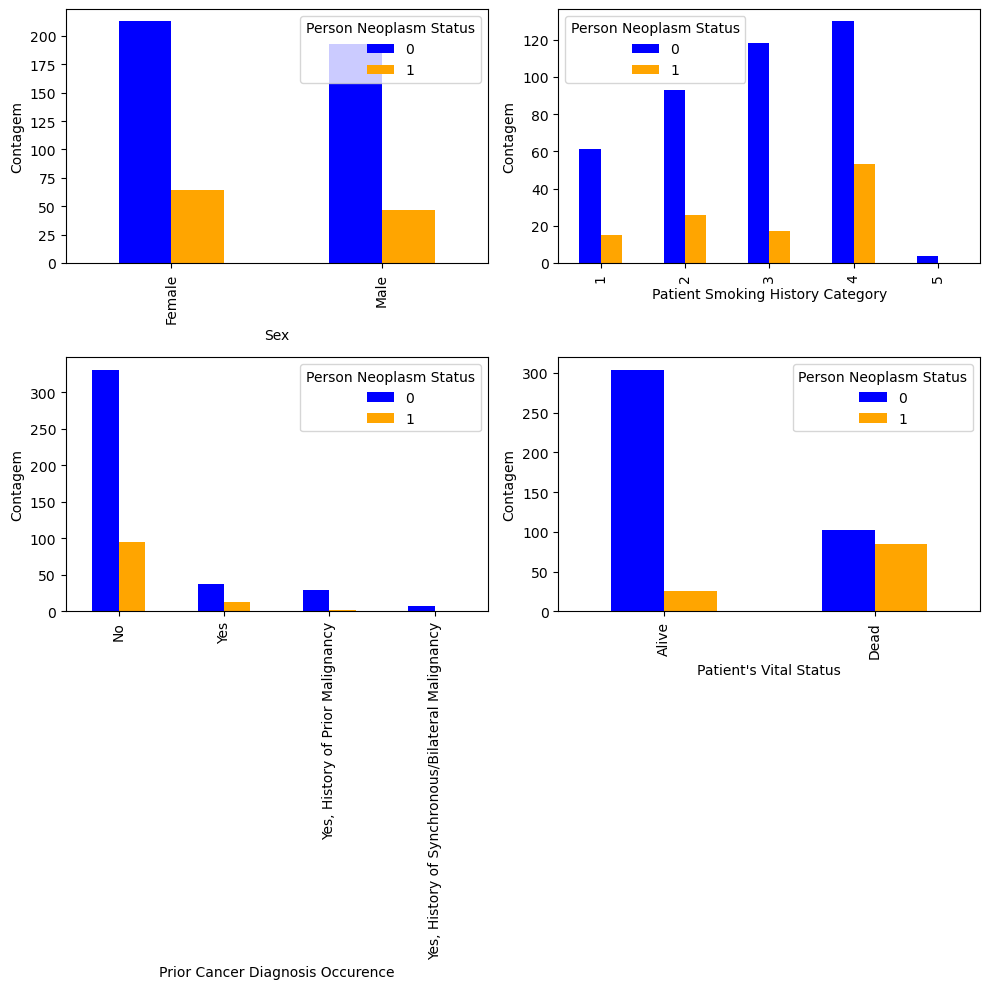

In [146]:
# Função para obtenção de graficos de barra
def plot_correlation(cat_1, cat_2):
    num_plots = len(cat_1)
    num_cols = 2  # Número de gráficos por linha
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular o número necessário de linhas

    plt.figure(figsize=(10, 10))
    colors = ['blue', 'orange', 'red', 'purple', 'green', 'yellow', 'pink', 'black', 'brown']

    for i, column in enumerate(cat_1, 1):
        plt.subplot(num_rows, num_cols, i)
        crosstab_data = pd.crosstab(index=new_meta[column], columns=new_meta[cat_2])
        crosstab_data.plot(kind="bar", stacked=False, color=colors, ax=plt.gca())
        plt.xlabel(column)
        plt.ylabel('Contagem')

    plt.tight_layout()
    plt.show()

# Comparar a existência ou não de tumor com diferentes atributos
plot_correlation(['Sex', 'Patient Smoking History Category', 'Prior Cancer Diagnosis Occurence',  "Patient's Vital Status"], "Person Neoplasm Status")

Pela análise dos gráficos:
* Não se verificam diferenças notáveis entre a ocorrência de tumor nos 2 géneros
* A maioria dos pacientes com tumor está na categoria 4 de historial de fumador
* Dos pacientes com tumor, a maioria não aprensenta historial de cancro
* A maioria dos pacientes com tumor, acabaram por falecer

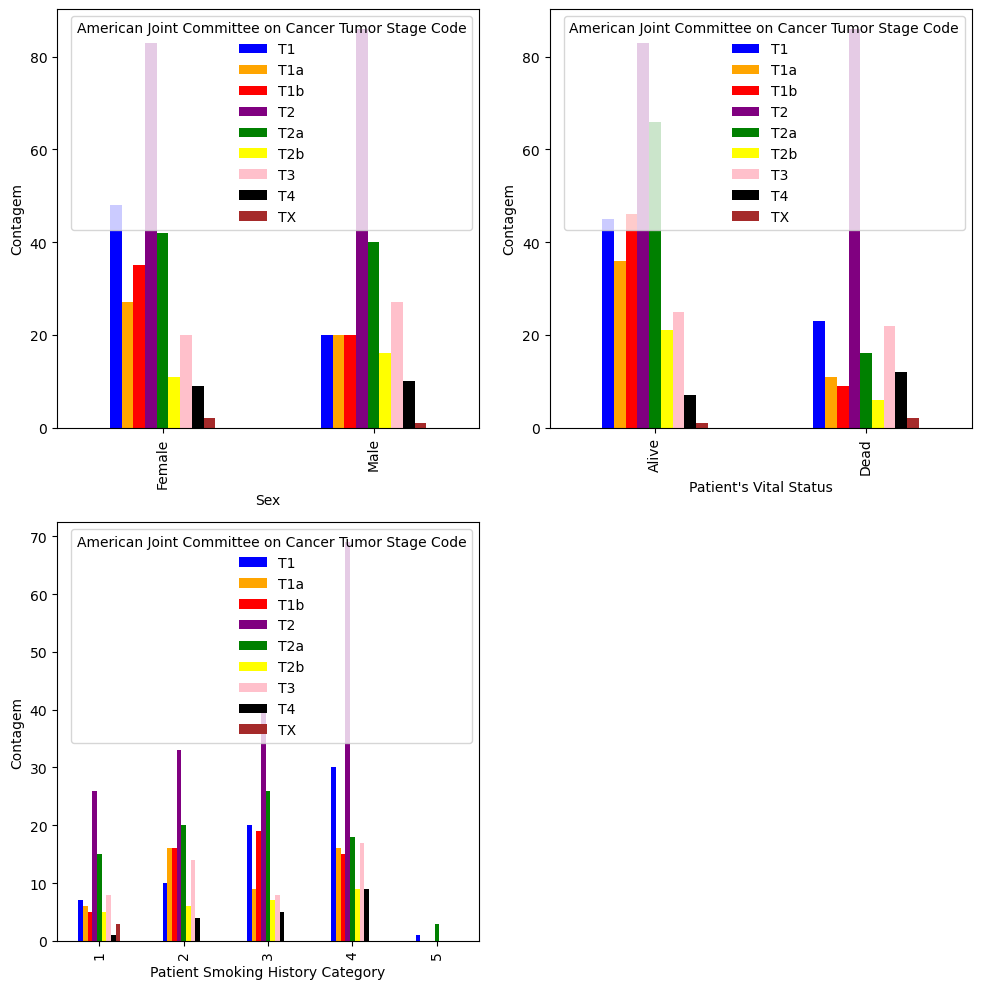

In [147]:
# Comparar os estádios da doença com diferentes atributos
plot_correlation(['Sex', "Patient's Vital Status", 'Patient Smoking History Category'], 'American Joint Committee on Cancer Tumor Stage Code')

Pela análise dos gráficos:
* Extrai-se que as mulheres apresentam uma maior incidência de tumores de extensão e/ou dimensão inferior
* A taxa de sobrevivência é menor em tumores de maior extensão e/ou dimensão e no que não dá para ser avaliado
* Quanto maior a categoria de fumador, maior a ocorrência de tumores, à exceção da categoria 5


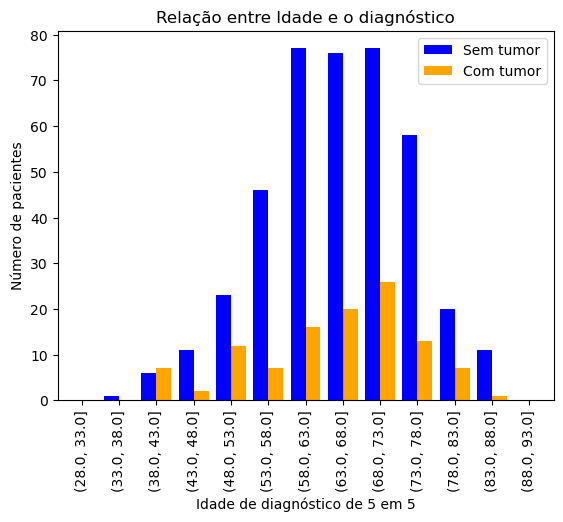

In [148]:
# Agrupar dados e contar ocorrência de cada combinação
grouped_data = new_meta.groupby([age_groups, "Person Neoplasm Status"]).size().unstack()

# Plot
grouped_data.plot(kind='bar', color=['blue', 'orange'], width=0.8)

# Título e identificacao dos eixos
plt.title('Relação entre Idade e o diagnóstico')
plt.xlabel('Idade de diagnóstico de 5 em 5')
plt.ylabel('Número de pacientes')

# Legenda
plt.legend(["Sem tumor", "Com tumor"], loc="upper right")

plt.show()

A ocorrência do tumor prevalece entre os 58 e 73, assim como o número de pacientes. Desta forma, não foi possível concluir acerca do mesmo.

<Figure size 1200x800 with 0 Axes>

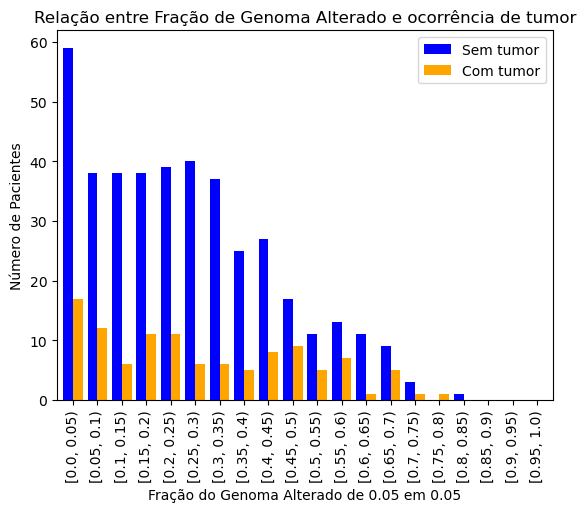

In [149]:
# Intervalos de 0.05 para a 'Fraction Genome Altered'
# arange permite passos decimais
bins = np.arange(0, 1.05, 0.05)

# Agrupar em bins e contar o tamanho de cada grupo
group_fraction = pd.cut(new_meta['Fraction Genome Altered'], bins=bins, include_lowest=True, right=False)
grouped_data = new_meta.groupby([group_fraction, "Person Neoplasm Status"]).size().unstack()


# Tamanho da figura
plt.figure(figsize=(12, 8))

# Plot
grouped_data.plot(kind='bar', color=['blue', 'orange'], width=0.8)

# Título e identificacao dos eixos
plt.title('Relação entre Fração de Genoma Alterado e ocorrência de tumor')
plt.xlabel('Fração do Genoma Alterado de 0.05 em 0.05')
plt.ylabel('Número de Pacientes')

# Legenda
plt.legend(["Sem tumor", "Com tumor"], loc="upper right")

plt.show()

Através do gráfico, não foi possível estabelecer nenhuma relação entre a fração de genoma alterado e a ocorrência de tumor.

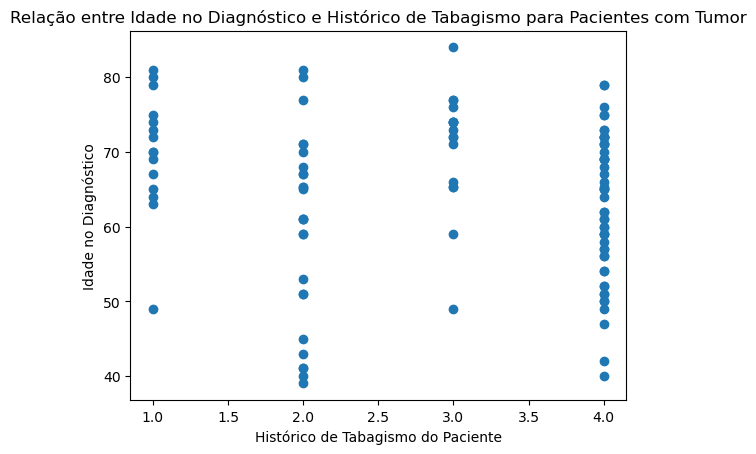

In [150]:
# Filtrar os pacientes que faleceram
deceased_patients = new_meta[new_meta['Person Neoplasm Status'] == 1]

# Extrair dados relevantes
OS = deceased_patients['Diagnosis Age'].values
TD = deceased_patients['Patient Smoking History Category'].values

# Plot
plt.scatter(TD, OS)
plt.xlabel('Histórico de Tabagismo do Paciente')
plt.ylabel('Idade no Diagnóstico')
plt.title('Relação entre Idade no Diagnóstico e Histórico de Tabagismo para Pacientes com Tumor')

plt.show()

Como verificado anteriormente, a presença de tumor associa-se ao aumento de idade e da categoria de historial de fumador, à exceção da categoria 5.

## Etapa 2

Na etapa 2, explorou-se a correlação entre a expressão genética dos diferentes genes e a coluna objetivo, _Person Neoplam Status_, listando-se os 30 melhores e piores resultados, para servirem como dados de entrada nos processos de aprendizagem, visando uma melhor performance destes.

Para a filtragem de dados, verificou-se, primeiramente, a variância dos mesmos, observando-se que estes tinham baixa variabilidade, explorando-se, de seguida, 2 métodos de filtragem distintos _SelectPercentile_ e _VarianceThreshold_.

Seguidamente, uniu-se e normalizou-se os dados resultantes da correlação e da redução por variabilidade, a fim de formar um conjunto mais completo de dados para a aprendizagem.

Por fim, na aprendizagem não supervisionada, aplicaram-se técnicas de redução de dimensionalidade, _PCA (Principal Component Analysis)_, de _clustering_ hierárquico e de _K-means clustering_.


In [151]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans

#### Correlação

Retorna os 30 genes correlacionados com a coluna objetivo, ou seja, _Person Neoplasm Status_.

In [152]:
# Merge de data_transposta e new_meta pela coluna Sample ID
# Merge à esquerda, ou seja, mantendo os valores do primeiro df e adicionando apenas a coluna do segundo df
data_transposta = pd.merge(data_transposta, new_meta[['Sample ID', 'Person Neoplasm Status']], on='Sample ID', how='left')

In [153]:
# Variável criada apenas para correlação, sendo necessario retirar a coluna Sample ID devido ao formato
data_transposta_test = data_transposta.drop(columns='Sample ID')

# Verificar
data_transposta_test.columns

Index(['LOC100130426', 'UBE2Q2P3', 'UBE2Q2P3', 'LOC149767', 'TIMM23', 'MOXD2',
       'LOC155060', 'RNU12-2P', 'SSX9', 'LOC317712',
       ...
       'ZXDB', 'LOC100130182', 'ZYG11A', 'ZYG11B', 'ZYX', 'FLJ10821', 'ZZZ3',
       'HUMRTVLH3', 'AKR1C6P', 'Person Neoplasm Status'],
      dtype='object', length=20530)

In [154]:
# Matriz de correlação 
corr_matrix = data_transposta_test.corr()

# Visualizar matriz em série
top_corr = corr_matrix.unstack()

# Evitar correlação entre o proprio gene
top_corr = top_corr[top_corr != 1] 

In [155]:
# Top 30 melhores
top_30_corr = top_corr['Person Neoplasm Status'].nlargest(30) 

print(top_30_corr)

LOC285696       0.222353
LINC00592       0.197707
LOC439963       0.193796
KRT18           0.192893
OPN3            0.192631
SLC7A5          0.191482
BASP1           0.188579
SNORD94         0.186650
SNORA78         0.184394
XRCC5           0.182317
TMOD3           0.181272
RRM2            0.179966
FSGS1           0.177879
PROCR           0.177585
RFC3            0.175996
FSCN1           0.175539
LOC115042       0.173409
OR1F10          0.173051
LOC100505888    0.172249
MT2A            0.172133
LOC88851        0.170164
LOC101928538    0.170046
LDLRAD3         0.168868
UCN2            0.168601
ANLN            0.168593
NCL             0.168380
ATP2B1          0.166515
PRHOXNB         0.165243
BCAR3           0.165028
EKV             0.163801
dtype: float64


In [156]:
#Top 30 piores
top_down_30_corr = top_corr["Person Neoplasm Status"].nsmallest(30)

print(top_down_30_corr)


CHRNA6         -0.175269
LRRC37A16P     -0.153292
LOC221402      -0.152585
FAM117A        -0.149851
TRMT10B        -0.147966
HCFC2          -0.147453
MLLT6          -0.146946
ZBTB5          -0.146182
RD             -0.145261
TMEM63A        -0.140906
ZNF763         -0.140864
ADCY6          -0.140828
CORO2A         -0.139451
ZNF44          -0.139139
ZNF564         -0.138572
PPFIBP2        -0.138349
FICD           -0.137830
SIRT4          -0.136230
LOC100131231   -0.135947
LOC100294335   -0.135101
CBX7           -0.134947
GGT3           -0.134519
KCNA3          -0.133616
C6orf95        -0.133542
LOC112990      -0.133282
ATG4A          -0.133205
KRTAP5-AS1     -0.133187
LOC158014      -0.132021
HSCATHEP       -0.131913
ACAD8          -0.131591
dtype: float64


#### Variabilidade do data_transposta

In [157]:
# auxiliar = data_transposta sem Sample ID e sem Coluna Objetivo para os proximos passos
aux = data_transposta_test.drop(columns="Person Neoplasm Status")

# Verificar
aux.columns

Index(['LOC100130426', 'UBE2Q2P3', 'UBE2Q2P3', 'LOC149767', 'TIMM23', 'MOXD2',
       'LOC155060', 'RNU12-2P', 'SSX9', 'LOC317712',
       ...
       'ZXDA', 'ZXDB', 'LOC100130182', 'ZYG11A', 'ZYG11B', 'ZYX', 'FLJ10821',
       'ZZZ3', 'HUMRTVLH3', 'AKR1C6P'],
      dtype='object', length=20529)

In [158]:
# Colocar o dataset como apenas a matriz dos valores
data = aux.values
print(data.shape)

(517, 20529)


In [159]:
print('Dados de expressão genética')

# Calcular a variância para cada gene
variances = data.var(axis=0)
num_genes = variances.shape[0]
print('Número de genes:', f'{num_genes:}')

# Média
medvar = variances.mean() 
print('Média da Variância:', medvar)

# Desvio padrão
std = data.std()
medstd = std.mean()
print('Desvio Padrão:', medstd)

Dados de expressão genética
Número de genes: 20529
Média da Variância: 14004342.851514589
Desvio Padrão: 5100.288514458409


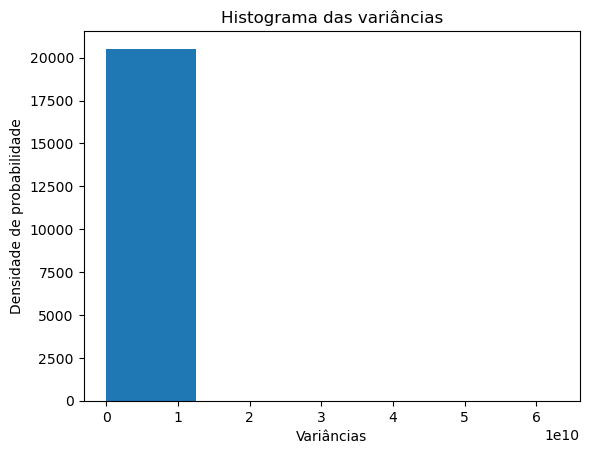

In [160]:
plt.hist(variances, bins = 5)
plt.xlabel('Variâncias')
plt.ylabel('Densidade de probabilidade')
plt.title('Histograma das variâncias')
plt.show()

O único pico à esquerda, indica uma distribuição assimétrica positiva. Isto significa que a maior parte dos genes tem pouca variabilidade, ou seja, tem características semelhantes.

#### Filtragem dos dados

* Percentil

In [161]:
# Seleção dos genes com p < 0.01, comparando com o output pretendido, Vivo ou Falecido

selector = SelectPercentile(f_classif, percentile=10)

# Criar output_status 
output_status = new_meta["Patient's Vital Status"]

selector.fit_transform(aux, output_status)
genes_status = np.where(selector.pvalues_ < 0.01)

print(aux.columns[genes_status])

Index(['RNU12-2P', 'A2M', 'AAMP', 'ABCA2', 'HSA275973', 'ABCA6', 'ABCC2',
       'ABCD1', 'ABCD2', 'ABCE1',
       ...
       'ZNF836', 'ZNF844', 'LOC641907', 'ZNRF3', 'ZP3', 'ZSWIM3', 'ZWILCH',
       'ZWINT', 'LOC100130182', 'FLJ10821'],
      dtype='object', length=1835)


In [162]:
# Seleção dos genes com p < 0.01, comparando com o output pretendido, Paciente com ou sem tumor

selector = SelectPercentile(f_classif, percentile=10)

output_tumor = new_meta["Person Neoplasm Status"]
selector.fit_transform(aux, output_tumor)
genes_status = np.where(selector.pvalues_ < 0.01)

print(aux.columns[genes_status])

Index(['ABCF1', 'ACAD8', 'ACOT7', 'LOC115571', 'FSGS1', 'ADAMTS15',
       'LOC345667', 'ADCY6', 'ADRA1B', 'AGFG1',
       ...
       'ZNF564', 'ZNF574', 'FLJ20813', 'LOC112990', 'LOC101805489', 'ZNF763',
       'ZNF782', 'ZNF791', 'ZWILCH', 'ZWINT'],
      dtype='object', length=651)


A técnica teve uma melhor filtragem, com a coluna objetivo _Person Neoplasm Status_ , onde foram selecionados as expressões genéticas que apresentavam diferenças estatisticamente significativas.

* Variance Threshold

In [163]:
# Filtragem por variabilidade, removendo os genes de pouca variância
sel = VarianceThreshold(threshold=medvar*3) 
input_filt = sel.fit_transform(aux) 
print(input_filt.shape)

(517, 306)


In [164]:
# Verificação dos valores de variância dos dados filtrados, input_filt

print('Dados mais relevantes de expressão genética:')

# Variância
variances = input_filt.var(axis = 0)
num_genes = variances.shape[0]
print('Número de genes:', f'{num_genes:}')

# Média
medvar = variances.mean()
print('Média da Variância:', medvar)

# Desvio padrão
std_new = input_filt.std()
print('Desvio Padrão:',std_new)

Dados mais relevantes de expressão genética:
Número de genes: 306
Média da Variância: 889978068.7234744
Desvio Padrão: 36245.131712638205


Como previsto pela distribuição assimétrica, o filtro removeu grande parte dos genes, passando de 20529 para 306 genes. Os 306 genes são os que apresentam maior variância, portanto a sua compreensão trará mais vantagens para a análise.

Como se pode verificar, a variância aumentou significativamente, provando-se a eficácia do filtro. Um valor mais elevado de variância permite chegar a conclusões mais interessantes a nível de investigação.

Assim, seguiu-se para os próximos passos com os resultados do método __Variance Threshold__ , pois se adequa a dados com baixa variância e não depende de nenhuma variável dos meta-dados.

__Junção dos genes resultantes das correlações e da variância__

In [165]:
# Transformar em DataFrame o input_filt
df_input = pd.DataFrame(input_filt, columns=aux.columns[sel.get_support()])

In [166]:
# Acrescentar a coluna Sample ID
df_input['Sample ID'] = data_transposta['Sample ID']

# Verificar
df_input['Sample ID']

0      TCGA-05-4244-01
1      TCGA-05-4249-01
2      TCGA-05-4250-01
3      TCGA-05-4382-01
4      TCGA-05-4384-01
            ...       
512    TCGA-NJ-A55O-01
513    TCGA-NJ-A55R-01
514    TCGA-NJ-A7XG-01
515    TCGA-O1-A52J-01
516    TCGA-S2-AA1A-01
Name: Sample ID, Length: 517, dtype: object

In [167]:
# Junção dos tops correlação, caso nao estejam já filtrados, a partir de merge pelo Sample Id
for i in top_30_corr.index:
    if i not in df_input.columns :
        df_input = pd.merge(df_input, data_transposta[['Sample ID', i]], on='Sample ID', how='left')

for i in top_down_30_corr.index:
    if i not in df_input.columns :
        df_input = pd.merge(df_input, data_transposta[['Sample ID', i]], on='Sample ID', how='left')

In [168]:
# Verificar colunas existentes
df_input.columns

Index(['A2M', 'LOC115571', 'DFNA26', 'ADAM6', 'AEBP1', 'AGR2', 'AHNAKRS',
       'AKR1B11', 'AKR1C1', 'TDD',
       ...
       'CBX7', 'GGT3', 'KCNA3', 'C6orf95', 'LOC112990', 'ATG4A', 'KRTAP5-AS1',
       'LOC158014', 'HSCATHEP', 'ACAD8'],
      dtype='object', length=364)

Verificou-se que foram adicionados mais 57 genes das correlações que não estavam previamente nos genes resultantes da variância (total de colunas = 306 genes da variância + 1 coluna 'Sample ID' + 57 genes adicionados pela correlação).

#### Normalização

In [169]:
# Remoção da Coluna Sample ID de modo a permitir a normalização
df_input = df_input.drop(columns = 'Sample ID')

# Armazenamento do nome das colunas para passos posteriores
colunas = df_input.columns

# Verificar
print(colunas)

Index(['A2M', 'LOC115571', 'DFNA26', 'ADAM6', 'AEBP1', 'AGR2', 'AHNAKRS',
       'AKR1B11', 'AKR1C1', 'TDD',
       ...
       'CBX7', 'GGT3', 'KCNA3', 'C6orf95', 'LOC112990', 'ATG4A', 'KRTAP5-AS1',
       'LOC158014', 'HSCATHEP', 'ACAD8'],
      dtype='object', length=363)


In [170]:
# Normalizar as expressões dos genes
input = preprocessing.scale(df_input)

# Verificar se tem média zero e desvio padrão igual a 1.
print("Media: ", input.mean())
print("Desvio padrao: ", input.std())

Media:  6.455314696841658e-18
Desvio padrao:  0.9999999999999999


## Aprendizagem não supervisionada

### PCA - Principal Component Analysis

In [171]:
# Retorna um array da variância explicada por cada componente principal
# Cada elem do array representa a proporção da variância do conjunto de dados que é atribuída a um componente principal específico.
pca = PCA(n_components=20)
X_r = pca.fit(input).transform(input)

print('Variância explicada: %s'% str(pca.explained_variance_ratio_))

pca.explained_variance_ratio_.sum()

Variância explicada: [0.13020728 0.07073351 0.0596461  0.03474073 0.03189588 0.02687885
 0.02210329 0.02101681 0.01904602 0.01887088 0.01471239 0.01395441
 0.01308084 0.01171478 0.01021465 0.0100136  0.00950937 0.00918891
 0.0087419  0.00842432]


0.5446945280642803

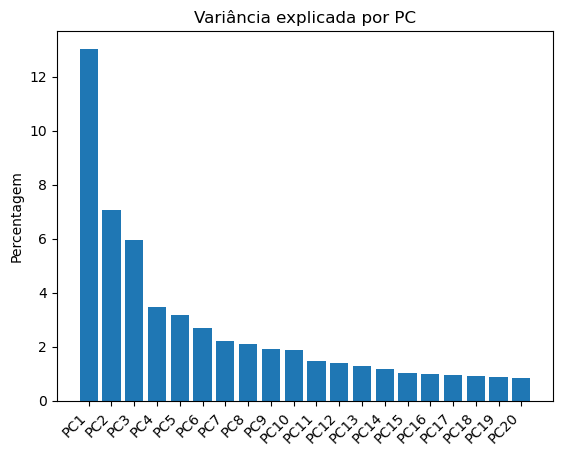

In [172]:
# Representação gráfica da variância explicada por PCA
n = 20

plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)],rotation=45, ha='right')
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

O primeiro componente principal é o que explica uma maior variância dos dados, cerca de 15%. Posteriormente, a percentagem explicada pelos restantes componentes principais decresce.

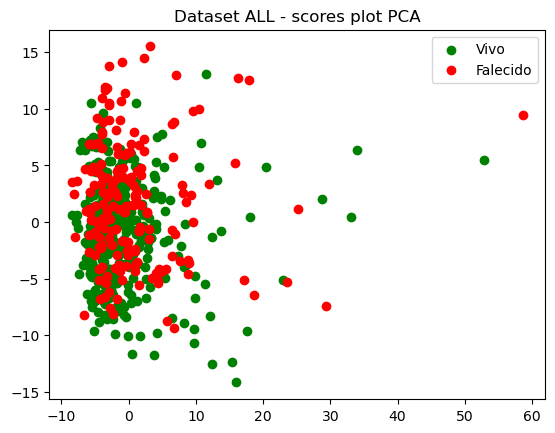

In [173]:
# PCA- scatter relativo ao Estado de Vitalidade do paciente

cores = ('Green','Red')
labels = ('Alive','Dead')
labels_names = ('Vivo','Falecido')
plt.figure()

for c, name, labels_names in zip(cores, labels, labels_names):
    plt.scatter(X_r[output_status == name, 0], X_r[output_status == name, 1], c=c, label = labels_names)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()


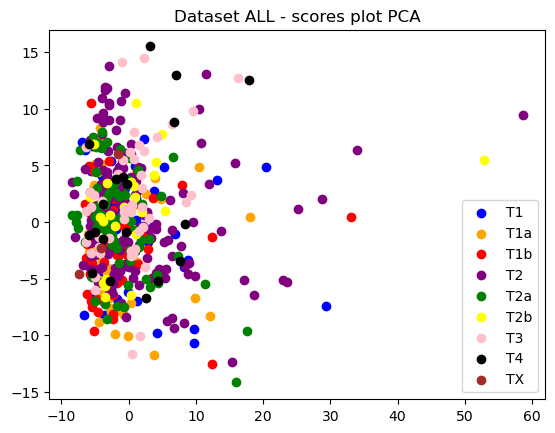

In [174]:
# PCA- scatter relativo ao Estadios

# Definição do output_stage
output_stage = new_meta["American Joint Committee on Cancer Tumor Stage Code"]

cores=('blue', 'orange', 'red', 'purple','green', 'yellow', 'pink', 'black', 'brown')
labels=('T1','T1a','T1b','T2','T2a','T2b','T3','T4','TX')
plt.figure()
for c, name in zip(cores,labels):
    plt.scatter(X_r[output_stage == name, 0], X_r[output_stage == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()


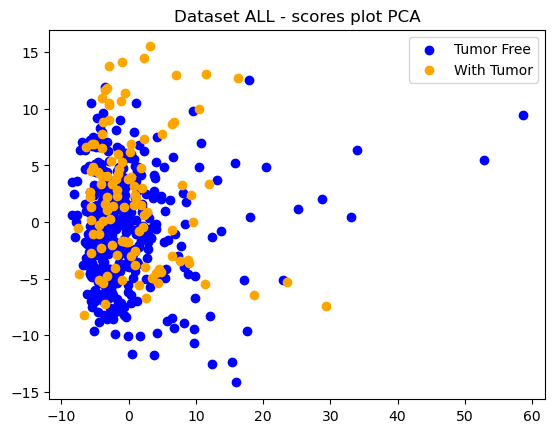

In [175]:
# PCA- scatter relativo a ter ou nao tumor
cores=('blue', 'orange')
labels=(0,1)
labels_nomes = ('Tumor Free','With Tumor')
plt.figure()
for c, name, labels_nomes in zip(cores, labels, labels_nomes):
    plt.scatter(X_r[output_tumor == name, 0], X_r[output_tumor == name, 1], c=c, label = labels_nomes)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()


O método PCA não permitiu visualizar distribuições distintas dos dados face às diferentes categorias selecionadas.

#### Dendograma de Cluster Hierárquico

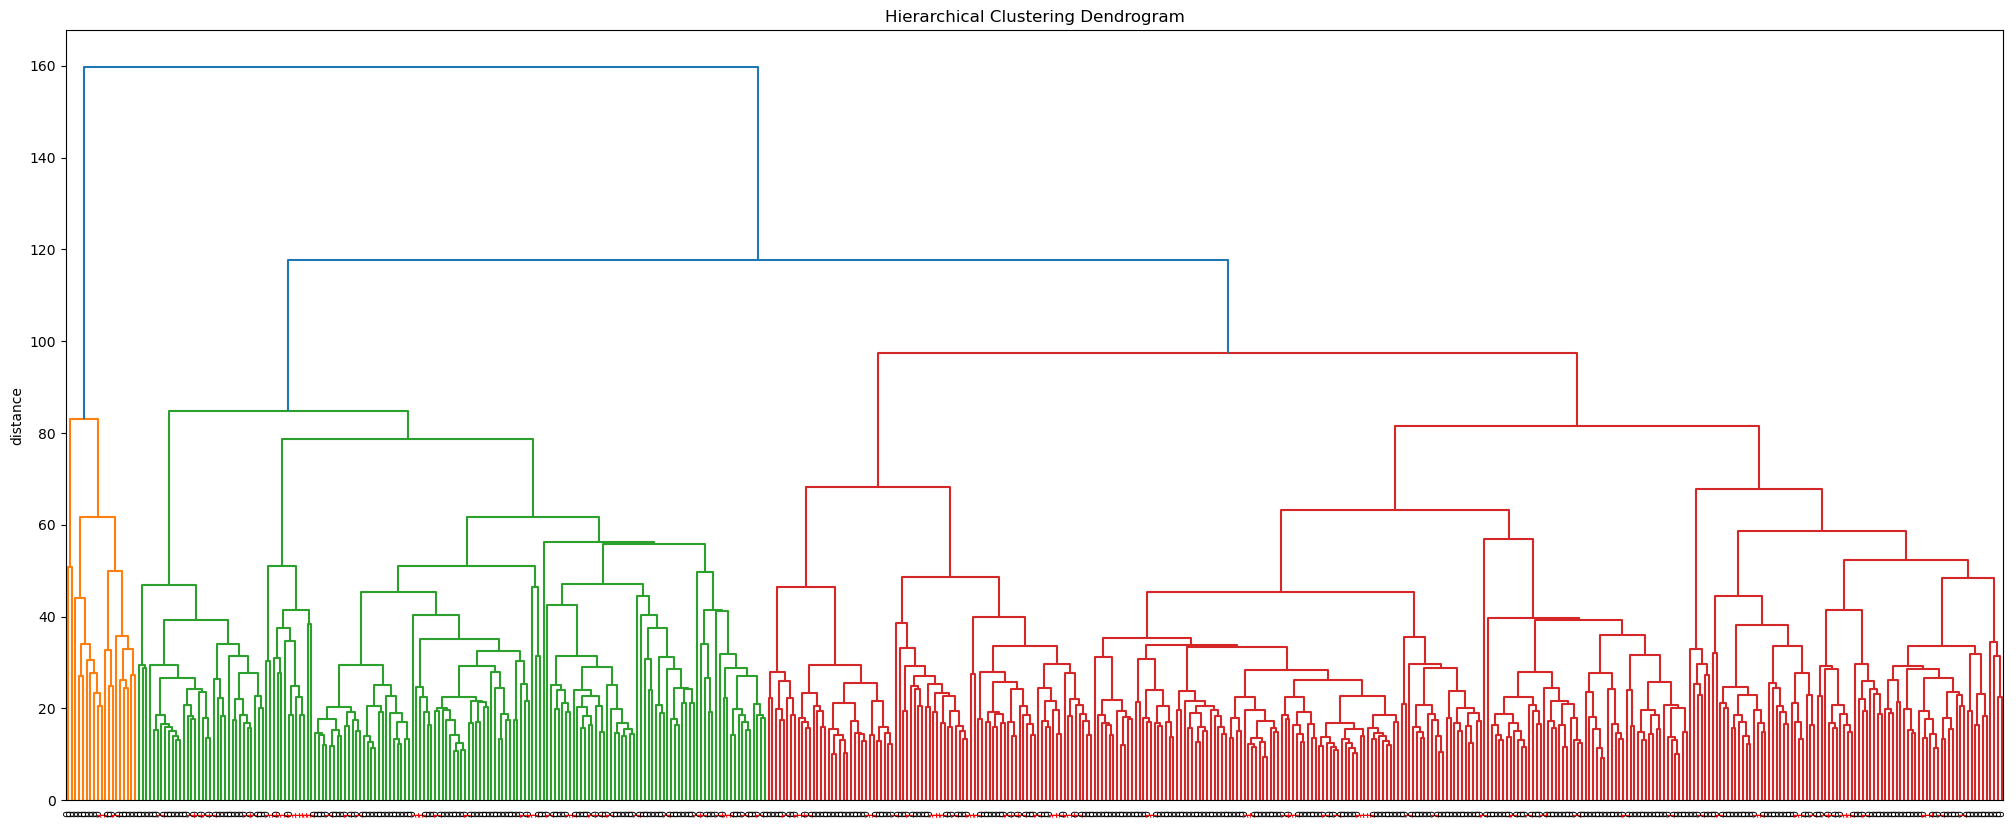

In [176]:
# Dendograma relacionado com o Tumor
Z = linkage(input, method='ward', metric='euclidean')

# Calcular Dendograma
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(output_tumor),
    leaf_rotation=90., 
    leaf_font_size=8., 
)

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')

label_colors = {'1': 'red', '0': 'black'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

Os genes foram divididos em 2 grandes grupos principais, dos quais um deles apresenta uma divisão noutros 2 grandes grupos.
Os diagnósticos ter ou não tumor, não ficaram nitidamente separados em grupos distintos.

### Clustering Hierárquico

In [177]:
# Clustering hierárquico para vivo ou falecido
hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
hclust.fit(input)

res_hc = hclust.labels_
pd.crosstab(output_status, res_hc)

col_0,0,1
Patient's Vital Status,,
Alive,317,13
Dead,181,6


Não foi possível obter clusters que separem eficazmente as amostras entre vivos ou mortos, como era de esperar pelo gráfico obtido por PCA referente ao estado vital. 

In [178]:
# Clustering hierárquico para tumor ou não
clust = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
clust.fit(input)

res = clust.labels_
pd.crosstab(output_tumor, res)

col_0,0,1
Person Neoplasm Status,,
0,390,16
1,108,3


Não foi possível obter clusters que separem eficazmente as amostras entre possuir ou não tumor, como era de esperar pelo gráfico obtido por PCA referente ao _Person Neoplasm Status_. 

In [179]:
# Clustering hierárquico para diferentes estadios
clu = AgglomerativeClustering(n_clusters=9, affinity="euclidean", linkage="ward")
clu.fit(input)

res = clu.labels_
pd.crosstab(output_stage, res)

col_0,0,1,2,3,4,5,6,7,8
American Joint Committee on Cancer Tumor Stage Code,,,,,,,,,
T1,12,18,23,0,4,0,2,4,5
T1a,6,7,25,0,3,0,2,4,0
T1b,6,14,23,0,5,0,2,1,4
T2,37,43,34,6,12,1,9,15,12
T2a,11,16,30,0,3,0,2,11,9
T2b,2,10,8,1,2,1,0,3,0
T3,8,10,11,4,3,0,0,8,3
T4,2,3,3,2,2,0,0,6,1
TX,0,0,2,0,0,0,0,1,0


Não foi possível obter clusters que separem eficazmente as amostras entre os diferentes estadios, como era de esperar pelo gráfico obtido por PCA referente aos estadios do tumor. 

In [180]:
# Clustering hierárquico para diferentes sexos
c = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
c.fit(input)

output_sex = new_meta['Sex']

res = c.labels_
pd.crosstab(output_sex, res)

col_0,0,1
Sex,,
Female,269,8
Male,229,11


Não foi possível obter clusters que separem eficazmente as amostras entre géneros.

### K-Means

In [181]:
# Relacionar com vivo e falecido
kmeans_est = KMeans(init='random', n_clusters=2, n_init = 100)
res_kmeans = kmeans_est.fit(input).predict(input)

pd.crosstab(output_status, res_kmeans)

col_0,0,1
Patient's Vital Status,,
Alive,299,31
Dead,159,28


Não foi possível obter clusters que separem eficazmente as amostras entre o resultado vivo ou morto.

In [182]:
# relacionar com estadios
kmeans_est = KMeans(init='random', n_clusters=9, n_init = 100)
res_kmeans = kmeans_est.fit(input).predict(input)

pd.crosstab(output_stage, res_kmeans)

col_0,0,1,2,3,4,5,6,7,8
American Joint Committee on Cancer Tumor Stage Code,,,,,,,,,
T1,14,0,25,0,4,7,13,0,5
T1a,5,0,24,0,2,5,9,0,2
T1b,11,0,24,0,1,2,14,1,2
T2,39,4,30,8,7,23,45,4,9
T2a,27,0,23,0,3,13,13,0,3
T2b,5,0,6,1,0,3,11,1,0
T3,8,3,10,4,1,11,10,0,0
T4,4,0,4,2,2,4,3,0,0
TX,1,0,1,0,0,0,1,0,0


Não foi possível obter clusters que separem eficazmente as amostras entre os diferentes estadios.

In [183]:
# relacionar com tumor
kmeans_est = KMeans(init='random', n_clusters=2, n_init = 100)
res_kmeans = kmeans_est.fit(input).predict(input)

pd.crosstab(output_tumor, res_kmeans)

col_0,0,1
Person Neoplasm Status,,
0,365,41
1,93,18


Mais uma vez, não se verificaram clusters que separem eficazmente os diagnósticos.

__Conclusão de aprendizagem não supervisionada:__

Os dados não apresentam diferenças notáveis que permitam separá-los em grupos que se associem a parâmetros distintos, como diagnósticos ou _outcomes_ de saúde. 

## Etapa 3

A previsão do output_tumor, ou seja, ter ou não tumor, foi efetuada a partir de dois input diferentes, o primeiro contém apenas os dados de expressão genética, enquanto o segundo inclui também meta-dados.

Divisão de 70% dos dados para treino e 30% para teste.

Comparar e analisar o comportamento dos modelos: _Random Forest, K Neighbours, SVMs RBF Kernel e Logistic Regression_.
* O modelo _Random Forest_ elabora árvores de decisão aleatórias, testa-as, selecionando atributos random e seleciona a mais eficaz, utiliza o out-of-bag error de modo a evitar _overfitting_.
* O modelo _K Neighbours/lazy learning_ calcula os k exemplos mais semelhantes e a partir destes obtém a classe que se pretende.
* O modelo _SVMs RBF Kernerl_ tem como objetivo encontrar o hiperplano que melhor separa duas classes no espaço de características. Para tal, utiliza uma função radial baseada nos vetores de suporte (que definem as fronteiras de decisão).
* O modelo _Logistic Regression_ usa modelos de regressão para classificação binária, interpretando os outputs do modelo para extrair uma classe.
    
Aplicou-se o _Grid Search_ a cada um dos modelos utilizados, este identifica os melhores parâmetros do modelo, de modo a melhorar a sua _accuracy_.

Análise da eficácia de cada modelo e comparação entre modelos através da _accuracy_ , _f1-score_ , média das pontuações de validação cruzada e matriz de confusão.

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [185]:
# Selecionar a classe de output
output_class = output_tumor.values

# Transformar o input em DataFrame para aprendizagem supervisionada
input_super_v1 = pd.DataFrame(input, columns = colunas)

# Verificar
input_super_v1.columns

Index(['A2M', 'LOC115571', 'DFNA26', 'ADAM6', 'AEBP1', 'AGR2', 'AHNAKRS',
       'AKR1B11', 'AKR1C1', 'TDD',
       ...
       'CBX7', 'GGT3', 'KCNA3', 'C6orf95', 'LOC112990', 'ATG4A', 'KRTAP5-AS1',
       'LOC158014', 'HSCATHEP', 'ACAD8'],
      dtype='object', length=363)

__Previsão recorrendo apenas à expressão genética__

In [186]:
# Definir a percentagem de dados usados para treino (70%) e para teste (30%)
X_train_v1, X_test_v1, Y_train_v1, Y_test_v1= train_test_split(input_super_v1, output_class, test_size=0.3, random_state=32)

In [187]:
# Verificar
print(X_train_v1.shape)
print(Y_train_v1.shape)

print(X_test_v1.shape)
print(Y_test_v1.shape)

(361, 363)
(361,)
(156, 363)
(156,)


* __Modelo: Random Forest__

In [188]:
rf_model_v1 = RandomForestClassifier(n_estimators=100)
rf_model_v1 = rf_model_v1.fit(X_train_v1, Y_train_v1)
prev_rf_v1 = rf_model_v1.predict(X_test_v1)

print("Accuracy: ", accuracy_score(Y_test_v1, prev_rf_v1) )
print("Sensibilidade: ", recall_score(Y_test_v1, prev_rf_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_rf_v1, average = 'weighted'))
print("F1-score: ", f1_score(Y_test_v1, prev_rf_v1, pos_label = 1) )
print("Média das pontuações de validação cruzada:", cross_val_score(rf_model_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Accuracy:  0.8141025641025641
Sensibilidade:  0.8141025641025641
Precisão:  0.8491092241092242
F1-score:  0.12121212121212122
Média das pontuações de validação cruzada: 0.7783105022831049


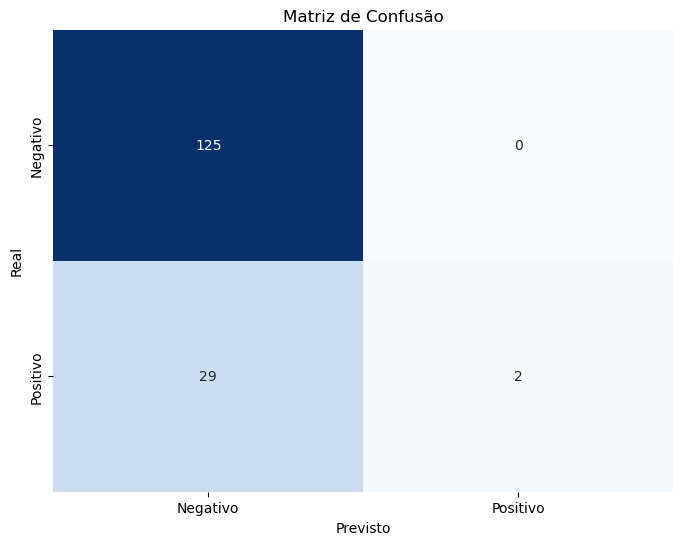

In [189]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test_v1, prev_rf_v1)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo obteve uma _accuracy_ de 81%, uma sensibilidade de 81%, uma precisão de 85%, uma média de pontuações da validação cruzada de 78%, e um número de falsos negativos (FN) extremamente elevado relativamente aos verdadeiros positivos. Verifica-se, também, um baixo _F1-score_ , que pode indicar dificuldade em equilibrar precisão e _recall_. Assim, o modelo tem pouca capacidade de prever a ocorrência de tumor, classe menor dos dados.

In [190]:
# Definir os parâmetros para pesquisa
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Criar o modelo 
rf_v1 = RandomForestClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_v1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train_v1, Y_train_v1)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_rf_modelo_v1 = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_rf_v1 = melhor_rf_modelo_v1.predict(X_test_v1)

# Métricas de avaliação
print("Accuracy:", accuracy_score(Y_test_v1, prev_rf_v1))
print("Sensibilidade: ", recall_score(Y_test_v1, prev_rf_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_rf_v1, average = 'weighted'))
print("F1-score:", f1_score(Y_test_v1, prev_rf_v1, pos_label=1))
print("Matriz de Confusão:", confusion_matrix(Y_test_v1, prev_rf_v1))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_rf_modelo_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Melhores Parâmetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8205128205128205
Sensibilidade:  0.8205128205128205
Precisão:  0.8169808116827983
F1-score: 0.2222222222222222
Matriz de Confusão: [[124   1]
 [ 27   4]]
Média das pontuações de validação cruzada: 0.7866438356164382


O _Grid Search_ não teve o impacto pretendido no modelo, melhorando apenas ligeiramente algumas métricas.

__Features mais importantes do modelo__

In [191]:
# Importâncias numéricas das features
importances = list(melhor_rf_modelo_v1.feature_importances_)

# Lista das colunas
random_forest_list = list(input_super_v1.columns)

# Fatores com importância
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(random_forest_list, importances)]

# Ordenar features da mais importante para a menos importante
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostrar as importâncias das features
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: TRMT10B              Importance: 0.02
Variable: ANXA2                Importance: 0.01
Variable: CO                   Importance: 0.01
Variable: CCT2                 Importance: 0.01
Variable: EEF2                 Importance: 0.01
Variable: ERRFI1               Importance: 0.01
Variable: FOS                  Importance: 0.01
Variable: HLA-C                Importance: 0.01
Variable: IGFBP3               Importance: 0.01
Variable: IGFBP5               Importance: 0.01
Variable: LOC115042            Importance: 0.01
Variable: BMS1P20              Importance: 0.01
Variable: PGC                  Importance: 0.01
Variable: EBS1                 Importance: 0.01
Variable: TXNRD1               Importance: 0.01
Variable: VIM                  Importance: 0.01
Variable: LOC285696            Importance: 0.01
Variable: LOC439963            Importance: 0.01
Variable: BASP1                Importance: 0.01
Variable: SNORD94              Importance: 0.01
Variable: SNORA78              Importanc

O gene que demonstrou maior importância na previsão foi TRMT10B com um valor de 0,02 este está associado à metilação do tRNA, disfunções neste processo poderão levar ao desenvolvimento de adenocarcinoma. Outros 36 genes apresentaram uma importância de 0,01. Este conjunto engloba proto-oncogenes, genes relacionados com a regulação do crescimento e proliferação celular, genes responsáveis pela regulação da expressão genética, bem como pelos processos de transcrição, tradução, e, ainda replicação do DNA, genes associados à regulação do sistema imunológico e resposta inflamatória.

* __Modelo: K Neighbours__

In [192]:
knn_model_v1 = KNeighborsClassifier()

knn_model_v1 = knn_model_v1.fit(X_train_v1, Y_train_v1)
prev_knn_v1 = knn_model_v1.predict(X_test_v1)

print("Accuracy: ", accuracy_score(Y_test_v1, prev_knn_v1) )
print("Sensibilidade: ", recall_score(Y_test_v1, prev_knn_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_knn_v1, average = 'weighted'))
print("F1-score: ", f1_score(Y_test_v1, prev_knn_v1, pos_label = 1) )
print ("Média das pontuações de validação cruzada:",cross_val_score( knn_model_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Accuracy:  0.782051282051282
Sensibilidade:  0.782051282051282
Precisão:  0.7148962148962149
F1-score:  0.15000000000000002
Média das pontuações de validação cruzada: 0.7533866057838661


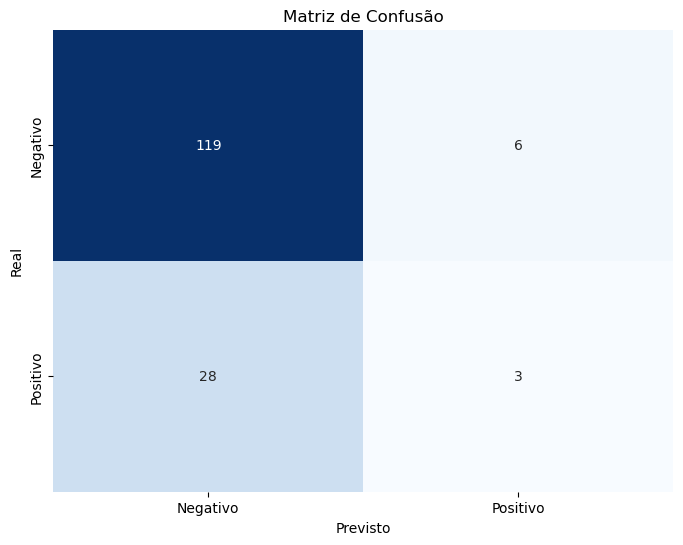

In [193]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test_v1, prev_knn_v1)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo tem uma _accuracy_ de 78%, uma sensibilidade de 78%, uma precisão de 71%, uma média das pontuações de validação cruzada de 75%, porém constata-se um número elevado de FN(28).

In [194]:
# Definir os parâmetros para pesquisa
param_grid = {
    'n_neighbors': [3, 5, 7],  # Valores possíveis para o número de vizinhos
    'weights': ['uniform', 'distance'],  # Peso dos vizinhos (uniforme ou por distância)
    'p': [1, 2]  # Parâmetro de potência para a métrica de distância (1 para Manhattan, 2 para Euclidiana)
}

# Criar o modelo 
knn_v1 = KNeighborsClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=knn_v1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train_v1, Y_train_v1)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_knn_modelo_v1 = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_knn_v1 = melhor_knn_modelo_v1.predict(X_test_v1)

# Métricas de avaliação
print("Accuracy:", accuracy_score(Y_test_v1, prev_knn_v1))
print("Sensibilidade: ", recall_score(Y_test_v1, prev_knn_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_knn_v1, average = 'weighted'))
print("F1-score:", f1_score(Y_test_v1, prev_knn_v1, pos_label=1))
print("Matriz de Confusão:", confusion_matrix(Y_test_v1, prev_knn_v1))
print("Accuracy com validação cruzada:", cross_val_score(melhor_knn_modelo_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Melhores Parâmetros: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.8141025641025641
Sensibilidade:  0.8141025641025641
Precisão:  0.8491092241092242
F1-score: 0.12121212121212122
Matriz de Confusão: [[125   0]
 [ 29   2]]
Accuracy com validação cruzada: 0.7618340943683408


O _Grid Search_ selecionou os melhores valores para os parâmetros do modelo, resultando numa melhoria moderada das métricas de avaliação. Contudo permanece uma fraca previsão da classe menos representada, ou seja, indivíduos com tumor.

* __Modelo: SVMs RBF Kernel__

In [195]:
svm_model_v1 = svm.SVC(gamma=0.001, C=100.)

svm_model_v1 = svm_model_v1.fit(X_train_v1, Y_train_v1)
prev_svm_v1 = svm_model_v1.predict(X_test_v1)

print("Accuracy: ", accuracy_score(Y_test_v1, prev_svm_v1) )
print("Sensibilidade: ", recall_score(Y_test_v1, prev_svm_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_svm_v1, average = 'weighted'))
print("F1-score: ", f1_score(Y_test_v1, prev_svm_v1, pos_label = 1))
print ("Média das pontuações de validação cruzada:", cross_val_score(svm_model_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Accuracy:  0.7628205128205128
Sensibilidade:  0.7628205128205128
Precisão:  0.7145718864468865
F1-score:  0.2127659574468085
Média das pontuações de validação cruzada: 0.7229071537290715


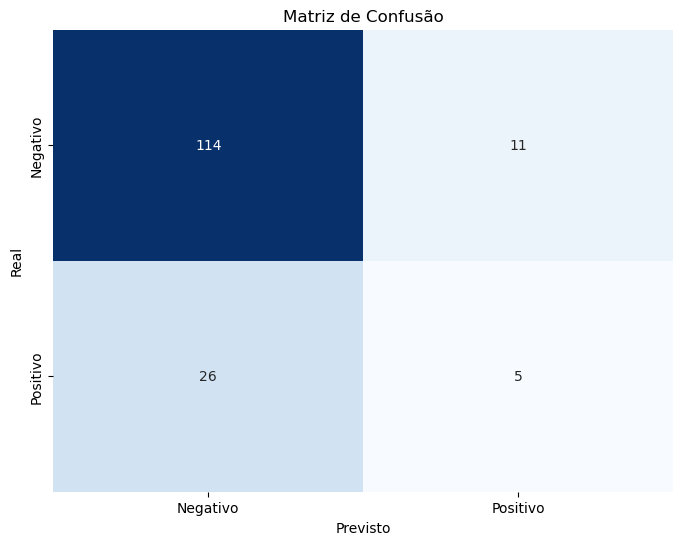

In [196]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test_v1, prev_svm_v1)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo apresenta uma _accuracy_ de 76%, uma sensibilidade de 76%, uma precisão de 71%, uma média das pontuações de validação cruzada de 72%, porém constata-se novamente um número de FN superior ao de verdadeiros positivos (VP).

In [197]:
# Definir os parâmetros para pesquisa
param_grid = {
    'C': [0.1, 1, 10], #C (parâmetro de regularização)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Criar o modelo 
svm_v1 = svm.SVC()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm_v1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train_v1, Y_train_v1)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_svm_modelo_v1 = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_svm_v1 = melhor_svm_modelo_v1.predict(X_test_v1)

# Métricas de avaliação
print("Accuracy: ", accuracy_score(Y_test_v1, prev_svm_v1) )
print("Sensibilidade: ", recall_score(Y_test_v1, prev_svm_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_svm_v1, average = 'weighted'))
print("F1-score: ", f1_score(Y_test_v1, prev_svm_v1, pos_label = 1))
print("Matriz de Confusão:", confusion_matrix(Y_test_v1, prev_svm_v1))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_svm_modelo_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Melhores Parâmetros: {'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}
Accuracy:  0.8012820512820513
Sensibilidade:  0.8012820512820513
Precisão:  0.7544611919611919
F1-score:  0.20512820512820512
Matriz de Confusão: [[121   4]
 [ 27   4]]
Média das pontuações de validação cruzada: 0.7839421613394217


Verificou-se uma melhoria moderada das métricas de avaliação. A seleção dos melhores parâmetros para o modelo resultou na alteração de _SVMs RBF_ para _sigmoid_.

* __Modelo: Regressão Logística__

In [198]:
logistic_model_v1 = linear_model.LogisticRegression(solver = "liblinear", multi_class = "auto")

logistic_model_v1 = logistic_model_v1.fit(X_train_v1, Y_train_v1)
prev_lm_v1 = logistic_model_v1.predict(X_test_v1)

print("Accuracy: ", accuracy_score(Y_test_v1, prev_lm_v1) )
print("Sensibilidade: ", recall_score(Y_test_v1, prev_lm_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_lm_v1, average = 'weighted'))
print("F1-score: ", f1_score(Y_test_v1, prev_lm_v1, pos_label = 1))
print("Média das pontuações de validação cruzada:", cross_val_score(logistic_model_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Accuracy: 

 0.7243589743589743
Sensibilidade:  0.7243589743589743
Precisão:  0.7470350419725977
F1-score:  0.3768115942028986
Média das pontuações de validação cruzada: 0.6951293759512938


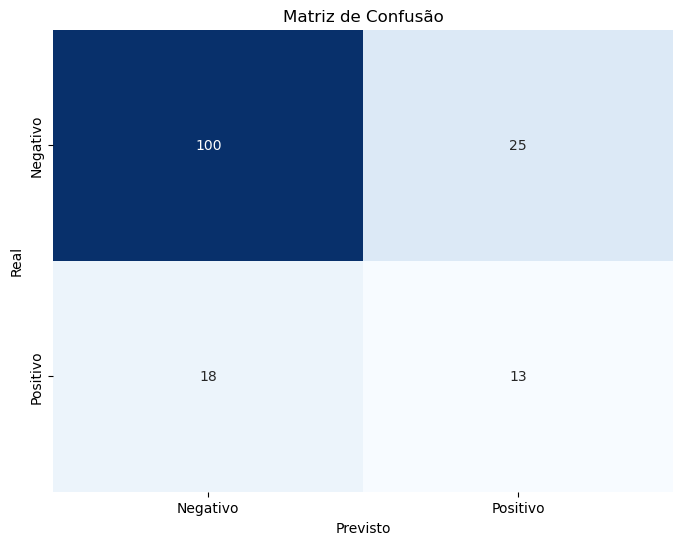

In [199]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test_v1, prev_lm_v1)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Com uma _accuracy_ de 72%, uma sensibilidade de 72%, uma precisão de 75%, uma média das pontuações de validação cruzada de 70%.
Este modelo apresenta um número mais equilibrado de FN relativamente aos VP, no entanto o número de FP aumentou face aos restantes modelos.

In [200]:
# Definir os parâmetros para pesquisa
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
}

# Criar o modelo 
logistic_v1 = linear_model.LogisticRegression()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_v1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train_v1, Y_train_v1)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_lm_modelo_v1 = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_lm_v1 = melhor_lm_modelo_v1.predict(X_test_v1)

# Métricas de avaliação
print("Accuracy: ", accuracy_score(Y_test_v1, prev_lm_v1) )
print("Sensibilidade: ", recall_score(Y_test_v1, prev_lm_v1, average = 'weighted'))
print("Precisão: ", precision_score(Y_test_v1, prev_lm_v1, average = 'weighted'))
print("F1-score: ", f1_score(Y_test_v1, prev_lm_v1, pos_label = 1))
print("Matriz de Confusão:", confusion_matrix(Y_test_v1, prev_lm_v1))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_lm_modelo_v1, X_train_v1, Y_train_v1, cv = 5).mean())

Melhores Parâmetros: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy:  0.7948717948717948
Sensibilidade:  0.7948717948717948
Precisão:  0.7424268852840281
F1-score:  0.19999999999999998
Matriz de Confusão: [[120   5]
 [ 27   4]]
Média das pontuações de validação cruzada: 0.7921613394216134


A aplicação do _Grid Search_ resultou num aumento da sensibilidade, dado que a previsão dos casos negativos foi melhor, verificando-se, no entanto, uma diminuição da precisão pela pior previsão dos casos positivos.

__Previsão recorrendo aos meta-dados__

In [201]:
# Transformar o input em DataFrame para aprendizagem supervisionada
input_super_v2 = pd.DataFrame(input, columns = colunas)

# Acrescentar a coluna Sample ID para merge
input_super_v2['Sample ID'] = data_transposta['Sample ID']

# Acrescentar o output aos dados de entrada
input_super_v2 = pd.merge(input_super_v2, new_meta[['Sample ID', 'Diagnosis Age','Fraction Genome Altered','Sex','Patient Smoking History Category', 'Prior Cancer Diagnosis Occurence']], on='Sample ID', how='left')

# Retirar Sample ID para ser possível aplicar os algoritmos de aprendizagem supervisionada
input_super_v2 = input_super_v2.drop(columns=['Sample ID'])

# Verificar
input_super_v2.columns

Index(['A2M', 'LOC115571', 'DFNA26', 'ADAM6', 'AEBP1', 'AGR2', 'AHNAKRS',
       'AKR1B11', 'AKR1C1', 'TDD',
       ...
       'ATG4A', 'KRTAP5-AS1', 'LOC158014', 'HSCATHEP', 'ACAD8',
       'Diagnosis Age', 'Fraction Genome Altered', 'Sex',
       'Patient Smoking History Category', 'Prior Cancer Diagnosis Occurence'],
      dtype='object', length=368)

In [202]:
# Alteração dos atributos para números inteiros, consoante a categoria
column_mapping = {
    'Sex': {'Female': 0, 'Male': 1},
    #'American Joint Committee on Cancer Tumor Stage Code': {'T1': 0, 'T1a': 1, 'T1b': 2, 'T2': 3, 'T2a': 4, 'T2b': 5, 'T3': 6, 'T4': 7, 'TX': 8},
    'Prior Cancer Diagnosis Occurence': {'No': 0, 'Yes': 1, 'Yes, History of Prior Malignancy': 2, 'Yes, History of Synchronous/Bilateral Malignancy': 3},
    #"Patient's Vital Status": {'Alive': 0, 'Dead': 1}
    }

for column, mapping in column_mapping.items():
    input_super_v2[column] = input_super_v2[column].map(mapping)

In [203]:
# Verificar
input_super_v2.head()

,A2M,LOC115571,DFNA26,ADAM6,AEBP1,AGR2,AHNAKRS,AKR1B11,AKR1C1,TDD,...,ATG4A,KRTAP5-AS1,LOC158014,HSCATHEP,ACAD8,Diagnosis Age,Fraction Genome Altered,Sex,Patient Smoking History Category,Prior Cancer Diagnosis Occurence
0,-0.694495,0.368049,-0.673908,-0.775496,-0.866084,-0.468940,-0.409719,-0.270531,-0.402759,-0.394669,...,2.639469,0.199832,-0.701733,-0.182642,-0.790871,70.0,0.4565,1,4,0
1,0.090745,-0.414867,0.336099,-0.352138,-0.483044,-0.641452,-0.663629,-0.261507,-0.403675,-0.396966,...,-0.427082,-0.622573,0.675025,-0.734256,0.393939,67.0,0.2221,1,3,0
2,-0.343200,1.079723,3.483304,-0.723176,-0.061989,-0.591180,0.237627,-0.270546,-0.402501,-0.397032,...,-0.839482,-0.224492,0.522695,-0.132853,-0.551553,79.0,0.2362,0,4,0
3,-0.027348,1.473808,-0.009011,0.346945,2.068672,-0.551320,-0.096633,-0.270812,-0.403340,-0.393609,...,-0.829871,-0.077465,-0.207462,2.370230,0.463329,68.0,0.0854,1,4,1
4,1.209226,-0.826279,-1.286733,-0.681410,-0.392626,-0.248461,0.619153,-0.129995,2.448338,2.783949,...,-1.062722,1.283246,-0.359327,-0.323349,0.083773,66.0,0.0661,1,3,1


In [204]:
# 30% para teste
X_train, X_test, Y_train, Y_test= train_test_split(input_super_v2, output_class, test_size=0.3, random_state=32, stratify=output_class)

In [205]:
# Verificar
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(361, 368)
(361,)
(156, 368)
(156,)


* __Modelo: Random Forest__

In [206]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model = rf_model.fit(X_train, Y_train)
prev_rf = rf_model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, prev_rf) )
print("Sensibilidade: ", recall_score(Y_test,prev_rf, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_rf, average = 'weighted'))
print("F1-score: ", f1_score(Y_test, prev_rf, pos_label = 1) )
print("Média das pontuações de validação cruzada:", cross_val_score(rf_model, X_train, Y_train, cv = 5).mean())

Accuracy:  0.8012820512820513
Sensibilidade:  0.8012820512820513
Precisão:  0.7715046777546778
F1-score:  0.24390243902439024
Média das pontuações de validação cruzada: 0.7923135464231355


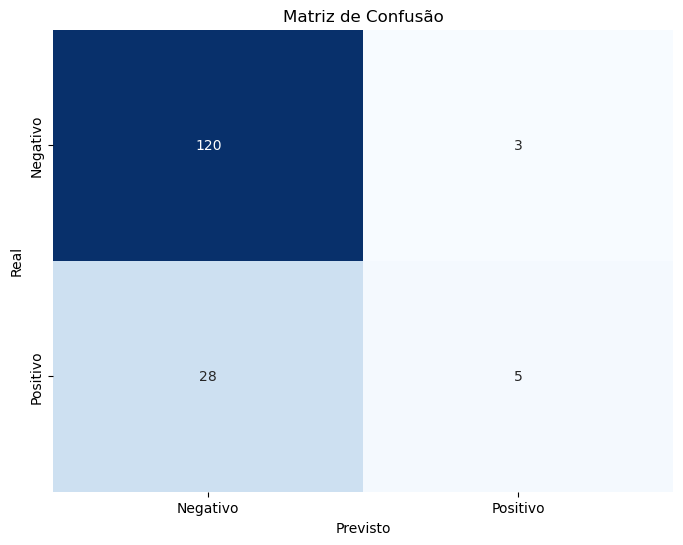

In [207]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test, prev_rf)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo demonstra uma _accuracy_ de 80%, uma sensibilidade de 80%, uma precisão de 77%, uma média das pontuações de validação cruzada de 79%. Assim, esta previsão foi semelhante à efetuada apenas com recurso à expressão genética.

In [208]:
# Definir os parâmetros para pesquisa
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Criar o modelo 
rf_model = RandomForestClassifier()

# Criar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train, Y_train)

# Mostrar os melhores parâmetros
print("Best Parameters:", grid_search.best_params_)

# Obter o melhor modelo
melhor_modelo_rf = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_rf = melhor_modelo_rf.predict(X_test)

# Métricas de avaliação
print("Accuracy:", accuracy_score(Y_test, prev_rf))
print("Sensibilidade: ", recall_score(Y_test,prev_rf, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_rf, average = 'weighted'))
print("F1-score:", f1_score(Y_test, prev_rf, pos_label=1))
print("Confusion Matrix:", confusion_matrix(Y_test, prev_rf))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_modelo_rf, X_train, Y_train, cv = 5).mean())

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7948717948717948
Sensibilidade:  0.7948717948717948
Precisão:  0.7587366276107997
F1-score: 0.15789473684210525
Confusion Matrix: [[121   2]
 [ 30   3]]
Média das pontuações de validação cruzada: 0.7950913242009132


A aplicação do _GridSearch_ não teve o impacto pretendido.

__Features mais importantes do modelo__

In [209]:
# Importâncias numéricas das features
importances = list(melhor_modelo_rf.feature_importances_)

# Lista das colunas
random_forest_list = list(input_super_v2.columns)

# Fatores com importância
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(random_forest_list, importances)]

# Ordenar features da mais importante para a menos importante
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Mostrar as importâncias das features
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: NCL                  Importance: 0.02
Variable: LOC115571            Importance: 0.01
Variable: CES2                 Importance: 0.01
Variable: CXCL14               Importance: 0.01
Variable: IGFBP5               Importance: 0.01
Variable: LOC115042            Importance: 0.01
Variable: LY6E                 Importance: 0.01
Variable: MMP2                 Importance: 0.01
Variable: SFTPC                Importance: 0.01
Variable: TGM2                 Importance: 0.01
Variable: TMSB4XP8             Importance: 0.01
Variable: LOC88851             Importance: 0.01
Variable: UBC                  Importance: 0.01
Variable: VIM                  Importance: 0.01
Variable: BASP1                Importance: 0.01
Variable: SNORD94              Importance: 0.01
Variable: XRCC5                Importance: 0.01
Variable: RRM2                 Importance: 0.01
Variable: FSGS1                Importance: 0.01
Variable: PROCR                Importance: 0.01
Variable: LOC101928538         Importanc

O parâmetro mais importante para a determinação da ocorrência ou não de tumor com este modelo foi o gene NCL com uma importância de 0.02, seguido de um grupo de 27 genes com valor de 0,01. O gene NCL está associado ao processamento de RNA, os restantes genes estão envolvidos em funções como regulação do crescimento celular, do sistema imunológico, sinalização celular e organização do citoesqueleto.

Ao contrário do que seria esperado, as colunas adicionadas dos meta-dados não tiveram impacto na previsão do objetivo.

* __Modelo: K Neighbours__

In [210]:
knn_model = KNeighborsClassifier()

knn_model = knn_model.fit(X_train, Y_train)
prev_knn = knn_model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, prev_knn) )
print("Sensibilidade: ", recall_score(Y_test,prev_knn, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_knn, average = 'weighted'))
print("F1-score: ", f1_score(Y_test, prev_knn, pos_label = 1) )
print ("Média das pontuações de validação cruzada:",cross_val_score( knn_model, X_train, Y_train, cv = 5).mean())

Accuracy:  0.7884615384615384
Sensibilidade:  0.7884615384615384
Precisão:  0.7303946053946054
F1-score:  0.05714285714285715


Média das pontuações de validação cruzada: 0.7646118721461186


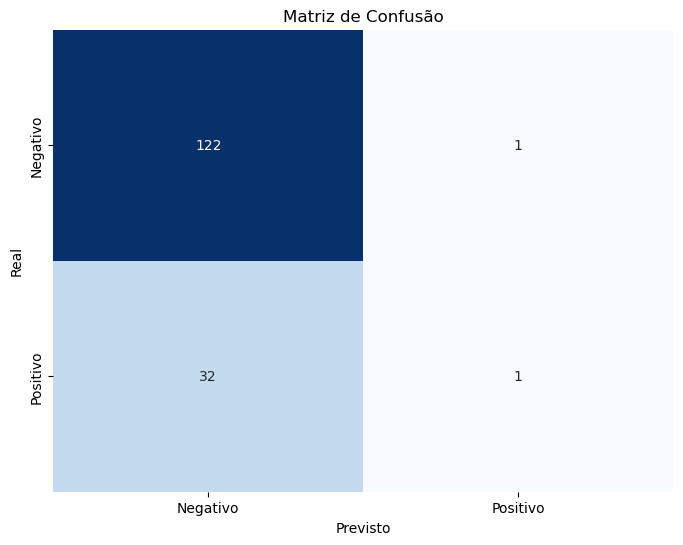

In [211]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test, prev_knn)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo tem uma _accuracy_ de 79%, uma sensibilidade de 79%, uma precisão de 73%, uma média das pontuações de validação cruzada de 76%, porém constata-se um número elevado de FN(32). Não se registaram melhorias com a adição dos meta-dados.

In [212]:
# Definir os parâmetros para pesquisa
param_grid = {
    'n_neighbors': [3, 5, 7],  # Valores possíveis para o número de vizinhos
    'weights': ['uniform', 'distance'],  # Peso dos vizinhos (uniforme ou por distância)
    'p': [1, 2]  # Parâmetro de potência para a métrica de distância (1 para Manhattan, 2 para Euclidiana)
}

# Criar o modelo 
knn_model = KNeighborsClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train, Y_train)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_knn_modelo = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_knn = melhor_knn_modelo.predict(X_test)

# Métricas de avaliação
print("Accuracy:", accuracy_score(Y_test, prev_knn))
print("Sensibilidade: ", recall_score(Y_test,prev_knn, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_knn, average = 'weighted'))
print("F1-score:", f1_score(Y_test, prev_knn, pos_label=1))
print("Matriz de Confusão:", confusion_matrix(Y_test, prev_knn))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_knn_modelo, X_train, Y_train, cv = 5).mean())

Melhores Parâmetros: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.7884615384615384
Sensibilidade:  0.7884615384615384
Precisão:  0.7430189673340358
F1-score: 0.23255813953488375
Matriz de Confusão: [[118   5]
 [ 28   5]]
Média das pontuações de validação cruzada: 0.7784246575342465


O _Grid Search_ não teve o efeito pretendido de aumentar as métricas de avaliação, melhorando a previsão dos casos positivos mas piorando a dos casos negativos.

* __Modelo: SVMs RBF Kernel__

In [213]:
svm_model = svm.SVC(gamma=0.001, C=100.)

svm_model = svm_model.fit(X_train, Y_train)
prev_svm = svm_model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, prev_svm) )
print("Sensibilidade: ", recall_score(Y_test,prev_svm, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_svm, average = 'weighted'))
print("F1-score: ", f1_score(Y_test, prev_svm, pos_label = 1))
print ("Média das pontuações de validação cruzada:", cross_val_score(svm_model, X_train, Y_train, cv = 5).mean())

Accuracy:  0.7564102564102564
Sensibilidade:  0.7564102564102564
Precisão:  0.7289586843362588
F1-score:  0.32142857142857145
Média das pontuações de validação cruzada: 0.7757610350076103


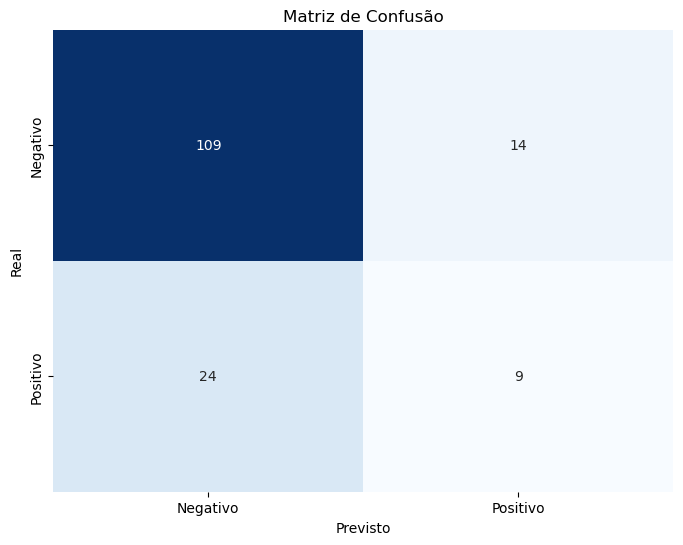

In [214]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test, prev_svm)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

O modelo apresenta uma _accuracy_ de 76%, uma sensibilidade de 76%, uma precisão de 73%, uma média das pontuações de validação cruzada de 78%, porém constata-se um número de FN superior ao VP. Logo, o modelo manteve a mesma performance, mesmo com a adição de mais informação nos dados de entrada.   

In [215]:
# Definir os parâmetros para pesquisa
param_grid = {
    'C': [0.1, 1, 10], #C (parâmetro de regularização)
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# Criar o modelo 
svm_model = svm.SVC()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train, Y_train)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_svm_modelo = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_svm = melhor_svm_modelo.predict(X_test)

# Métricas de avaliação
print("Accuracy: ", accuracy_score(Y_test, prev_svm) )
print("Sensibilidade: ", recall_score(Y_test,prev_svm, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_svm, average = 'weighted'))
print("F1-score: ", f1_score(Y_test, prev_svm, pos_label = 1))
print("Matriz de Confusão:", confusion_matrix(Y_test, prev_svm))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_svm_modelo, X_train, Y_train, cv = 5).mean())

Melhores Parâmetros: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy:  0.8076923076923077
Sensibilidade:  0.8076923076923077
Precisão:  0.7913931705878016
F1-score:  0.25
Matriz de Confusão: [[121   2]
 [ 28   5]]
Média das pontuações de validação cruzada: 0.7895357686453577


A aplicação do _Grid Search_ resultou numa melhoria moderada das métricas de avaliação. Para além disto verificou-se uma diminuição do número de FP, com aumento de FN.

* __Modelo: Regressão Logística__

In [216]:
logistic_model = linear_model.LogisticRegression(solver = "liblinear", multi_class = "auto")

logistic_model = logistic_model.fit(X_train, Y_train)
prev_lm = logistic_model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, prev_lm) )
print("Sensibilidade: ", recall_score(Y_test,prev_lm, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_lm, average = 'weighted'))
print("F1-score: ", f1_score(Y_test, prev_lm, pos_label = 1))
print("Média das pontuações de validação cruzada:", cross_val_score( logistic_model, X_train, Y_train, cv = 5).mean())

Accuracy:  0.7692307692307693
Sensibilidade:  0.7692307692307693
Precisão:  0.7389499389499389
F1-score:  0.33333333333333326
Média das pontuações de validação cruzada: 0.7342846270928463


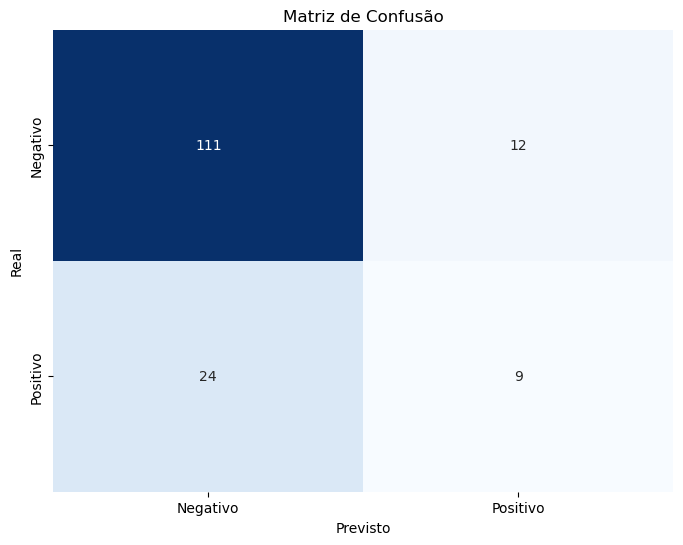

In [217]:
# Matriz de Confusão
conf_matrix = confusion_matrix(Y_test, prev_lm)

# Visualizar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

Com uma _accuracy_ de 77%, uma sensibilidade de 77%, uma precisão de 74%, uma média das pontuações de validação cruzada de 73%, e um valor de FN elevado. Este modelo não melhorou a sua prestação apesar da adição dos meta-dados.

In [218]:
# Definir os parâmetros para pesquisa
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
}

# Criar o modelo 
logistic_model = linear_model.LogisticRegression()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar a pesquisa aos dados
grid_search.fit(X_train, Y_train)

# Mostrar os melhores parâmetros
print("Melhores Parâmetros:", grid_search.best_params_)

# Obter o melhor modelo
melhor_lm_modelo = grid_search.best_estimator_

# Usar o melhor modelo para prever
prev_lm = melhor_lm_modelo.predict(X_test)

# Métricas de avaliação
print("Accuracy: ", accuracy_score(Y_test, prev_lm) )
print("Sensibilidade: ", recall_score(Y_test,prev_lm, average = 'weighted'))
print("Precisão: ", precision_score(Y_test,prev_lm, average = 'weighted'))
print("F1-score: ", f1_score(Y_test, prev_lm, pos_label = 1))
print("Matriz de Confusão:", confusion_matrix(Y_test, prev_lm))
print("Média das pontuações de validação cruzada:", cross_val_score(melhor_lm_modelo, X_train, Y_train, cv = 5).mean())

Melhores Parâmetros: {'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}
Accuracy:  0.8076923076923077
Sensibilidade:  0.8076923076923077
Precisão:  0.7846677132391419
F1-score:  0.28571428571428575
Matriz de Confusão: [[120   3]
 [ 27   6]]
Média das pontuações de validação cruzada: 0.8061263318112631


Uma vez mais, a aplicação do _Grid Search_ permitiu uma melhoria moderada das métricas, com uma diminuição dos FP e aumento do FN.

#### Conclusão etapa 3

Os resultados das métricas de avaliação dos modelos foram medianos, no entanto, perante o desiquilíbrio entre o número de indivíduos de cada classe (ter ou não tumor) estes resultados são insatisfatórios porque esta desproporção nos dados não permite que o modelo apresente boa capacidade de previsão da classe menos representada, neste caso, com tumor.

Tendo em conta as métricas de avaliação previamente analisadas, para cada um dos modelos, após proceder à sua comparação, concluiu-se que o modelo que melhor preveu se o indivíduo tem ou não tumor foi o _Random Forest_ resultante do _GridSearch_, na primeira versão, e o modelo de Regressão Logística, por _GridSearch_, na segunda versão.

A utilização da ferramenta _Grid Search_ permitiu, na maioria dos casos, uma melhoria dos valores das métricas de avaliação, no entanto, em alguns casos não teve esse efeito.

## Conclusão

Foi possível atingir o principal objetivo do trabalho, que se prende com a previsão de ocorrência ou não de tumor para cada indivíduo. No entanto, os resultados obtidos tanto na aprendizagem não supervisionada como na supervisionada não foram satisfatórios.

O objetivo de se terem realizado 2 versões de dados de entrada para algoritmos de aprendizagem supervisionada foi para avaliar se com mais informação clínica, as previsões seriam mais eficazes, contudo acabaram por ser semelhantes nas duas versões.

A previsão de casos clínicos através de modelos de _machine learning_ acarreta riscos de diagnósticos incorretos (FP e FN), que no caso dos FP podem levar à aplicação de terapias desnecessárias, enquanto nos FN pde resultar no atraso do tratamento e na progressão da doença. Assim, para um diagnóstico ser mais preciso, este deve assentar em múltiplos fatores, para além de se fazer uma maior recolha de dados, nomeadamente de pacientes com tumor. No entanto, é importante evitar aumentar a complexidade do modelo, para este manter a capacidade de generalizar.

O presente dataset não é, então, adequado para este tipo de previsões devido às suas características.